In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import random 

%load_ext autoreload


In [2]:
%autoreload 2

from file_reader import read_file


filename = "/Users/ilyalobanov/DS/FFT/junior_quant_task/train.txt" 
ob, prices = read_file(filename)


print(ob[0])
print(prices[0])

[(130990, 41, 'Sell'), (130985, 16, 'Sell'), (130980, 22, 'Sell'), (130975, 18, 'Sell'), (130970, 13, 'Sell'), (130965, 13, 'Sell'), (130960, 8, 'Sell'), (130955, 21, 'Sell'), (130950, 43, 'Sell'), (130945, 20, 'Sell'), (130940, 31, 'Sell'), (130935, 10, 'Sell'), (130930, 5, 'Sell'), (130925, 12, 'Sell'), (130920, 4, 'Sell'), (130915, 8, 'Sell'), (130910, 6, 'Sell'), (130905, 111, 'Sell'), (130900, 32, 'Sell'), (130895, 14, 'Sell'), (130880, 4, 'Buy'), (130875, 9, 'Buy'), (130870, 52, 'Buy'), (130865, 6, 'Buy'), (130860, 8, 'Buy'), (130855, 28, 'Buy'), (130850, 22, 'Buy'), (130845, 30, 'Buy'), (130840, 22, 'Buy'), (130835, 19, 'Buy'), (130830, 22, 'Buy'), (130825, 22, 'Buy'), (130820, 96, 'Buy'), (130815, 20, 'Buy'), (130810, 50, 'Buy'), (130805, 44, 'Buy'), (130800, 46, 'Buy'), (130795, 47, 'Buy'), (130790, 31, 'Buy'), (130785, 13, 'Buy')]
('Sell price', 130895)


In [3]:
%autoreload 2
from file_reader import split_data

train_ob, train_prices, test_ob, test_prices = split_data(ob, prices, 5000)

print(len(train_ob))
print(len(test_ob))

4000
5000


In [4]:
%autoreload 2
from func import calculate_statistics, plot_glass

for i in range(10):
    calculate_statistics(train_ob[i], train_prices[i])

Average Buy Price: 131892.5, Average Sell Price: 131992.5
Max Buy Price: 131940, Min Buy Price: 131845
Max Sell Price: 132040, Min Sell Price: 131945
Total Buy Volume: 850, Total Sell Volume: 558
Average Buy Volume: 42.5, Average Sell Volume: 27.9
Algorithm price: ('Sell price', 131960)
---
Average Buy Price: 131947.5, Average Sell Price: 132052.5
Max Buy Price: 131995, Min Buy Price: 131900
Max Sell Price: 132100, Min Sell Price: 132005
Total Buy Volume: 567, Total Sell Volume: 463
Average Buy Volume: 28.35, Average Sell Volume: 23.15
Algorithm price: ('Sell price', 132015)
---
Average Buy Price: 131942.5, Average Sell Price: 132047.5
Max Buy Price: 131990, Min Buy Price: 131895
Max Sell Price: 132095, Min Sell Price: 132000
Total Buy Volume: 889, Total Sell Volume: 844
Average Buy Volume: 44.45, Average Sell Volume: 42.2
Algorithm price: ('Sell price', 132010)
---
Average Buy Price: 131482.5, Average Sell Price: 131617.5
Max Buy Price: 131530, Min Buy Price: 131435
Max Sell Price: 13

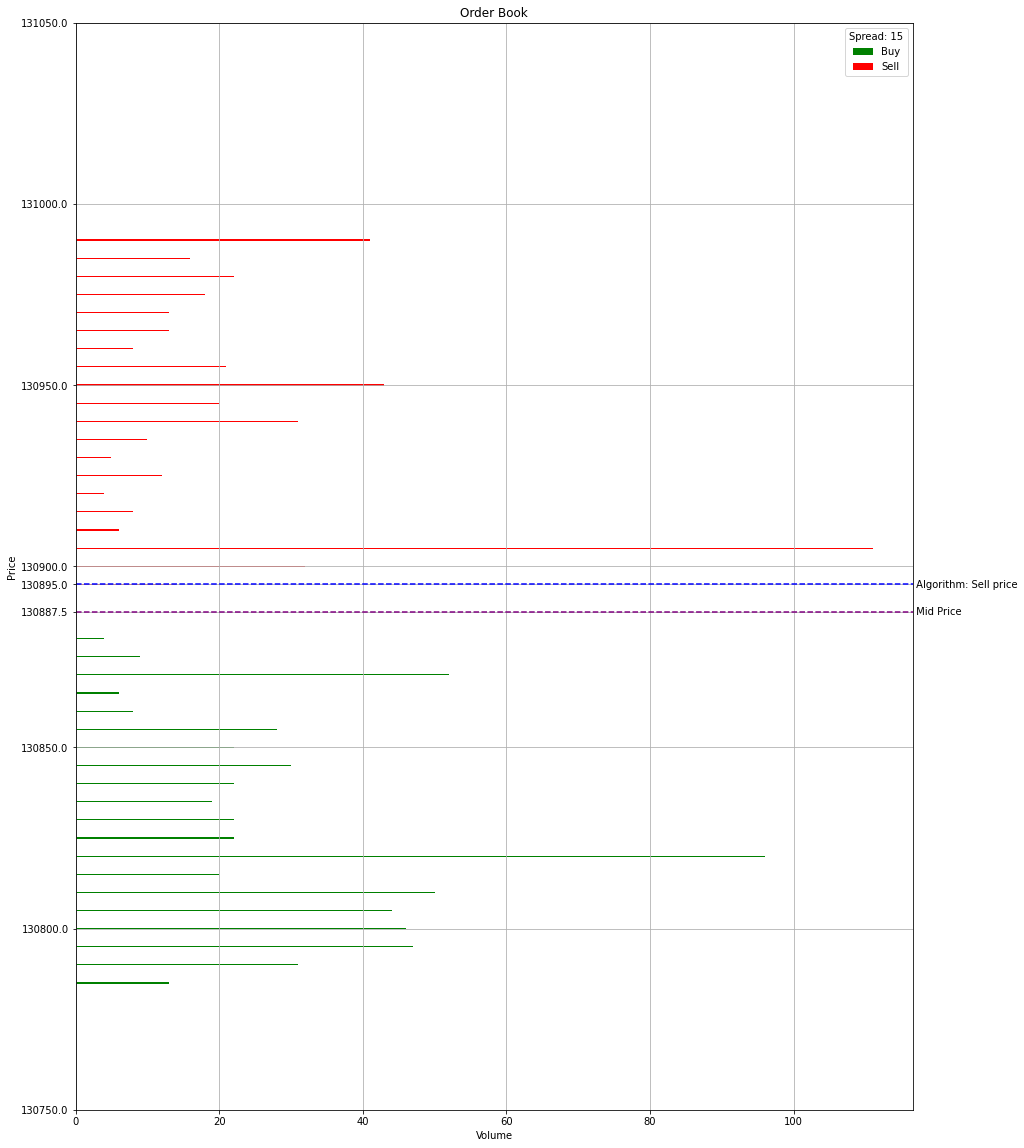

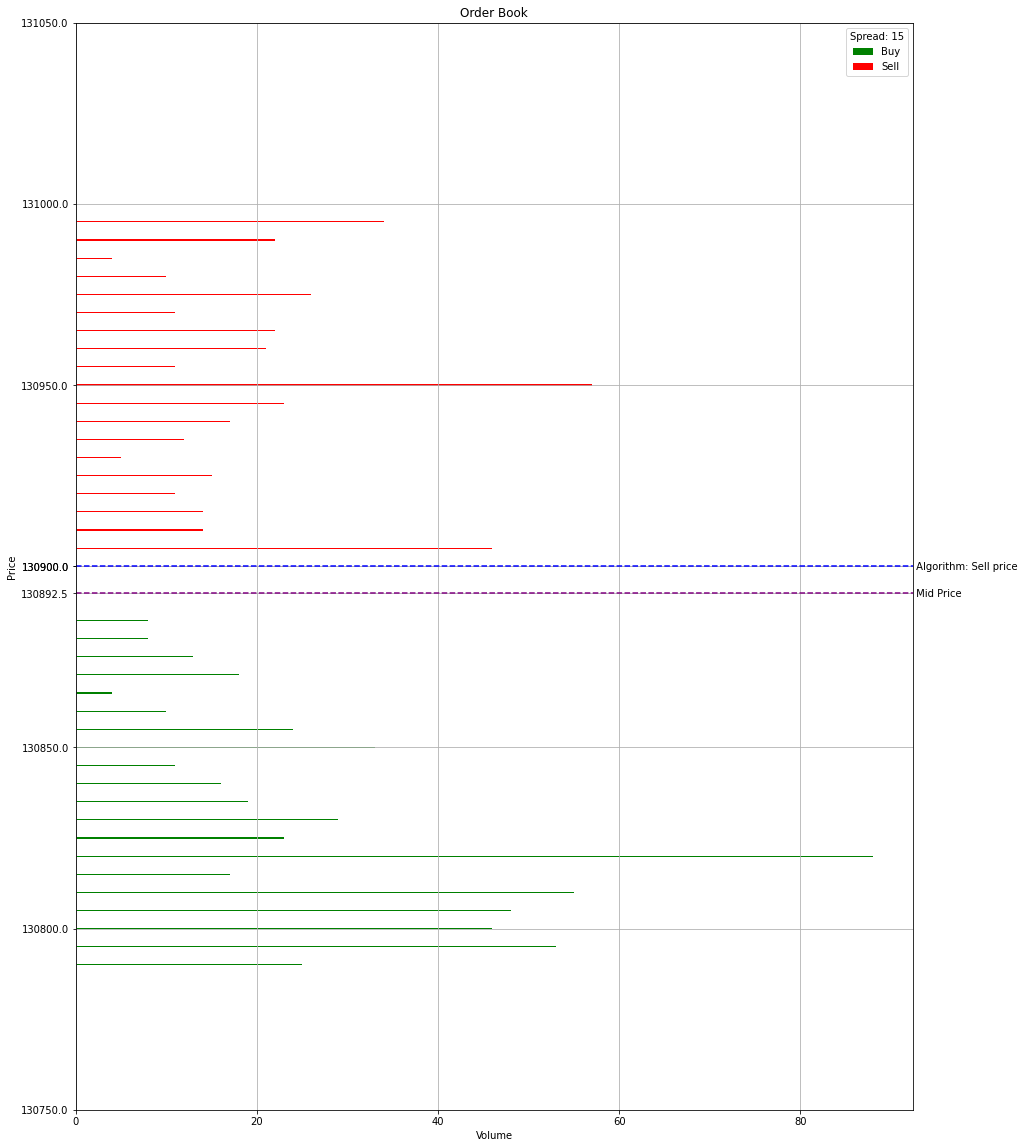

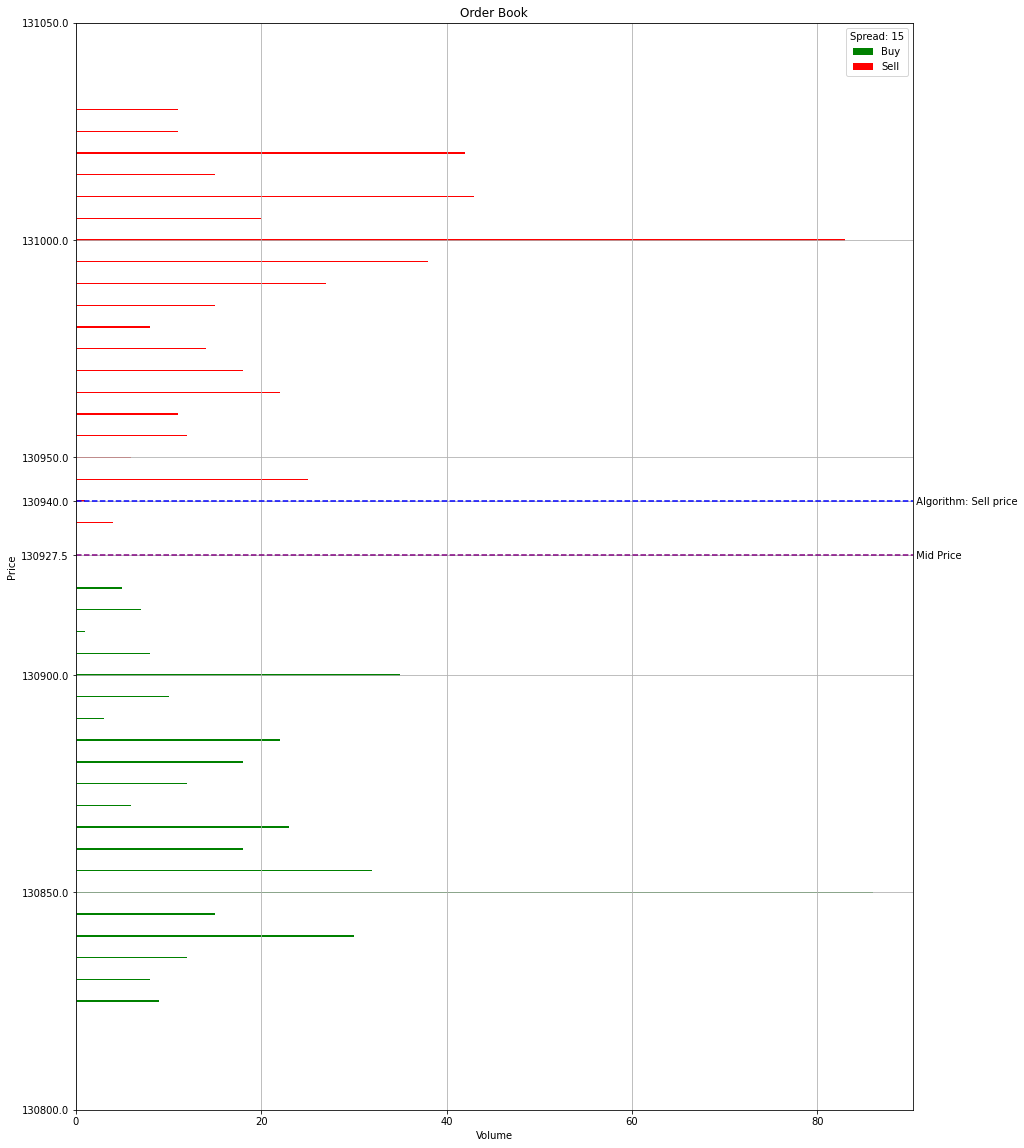

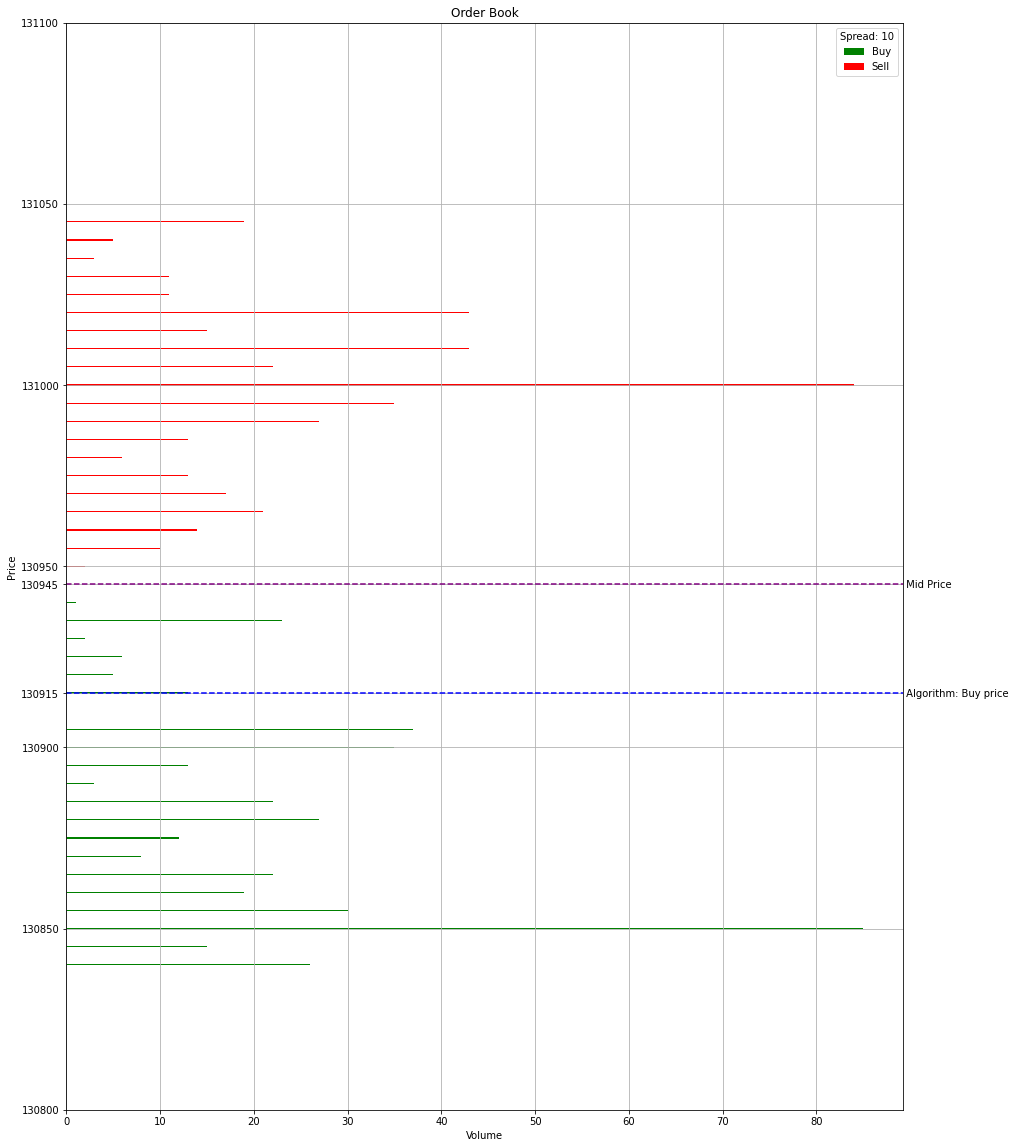

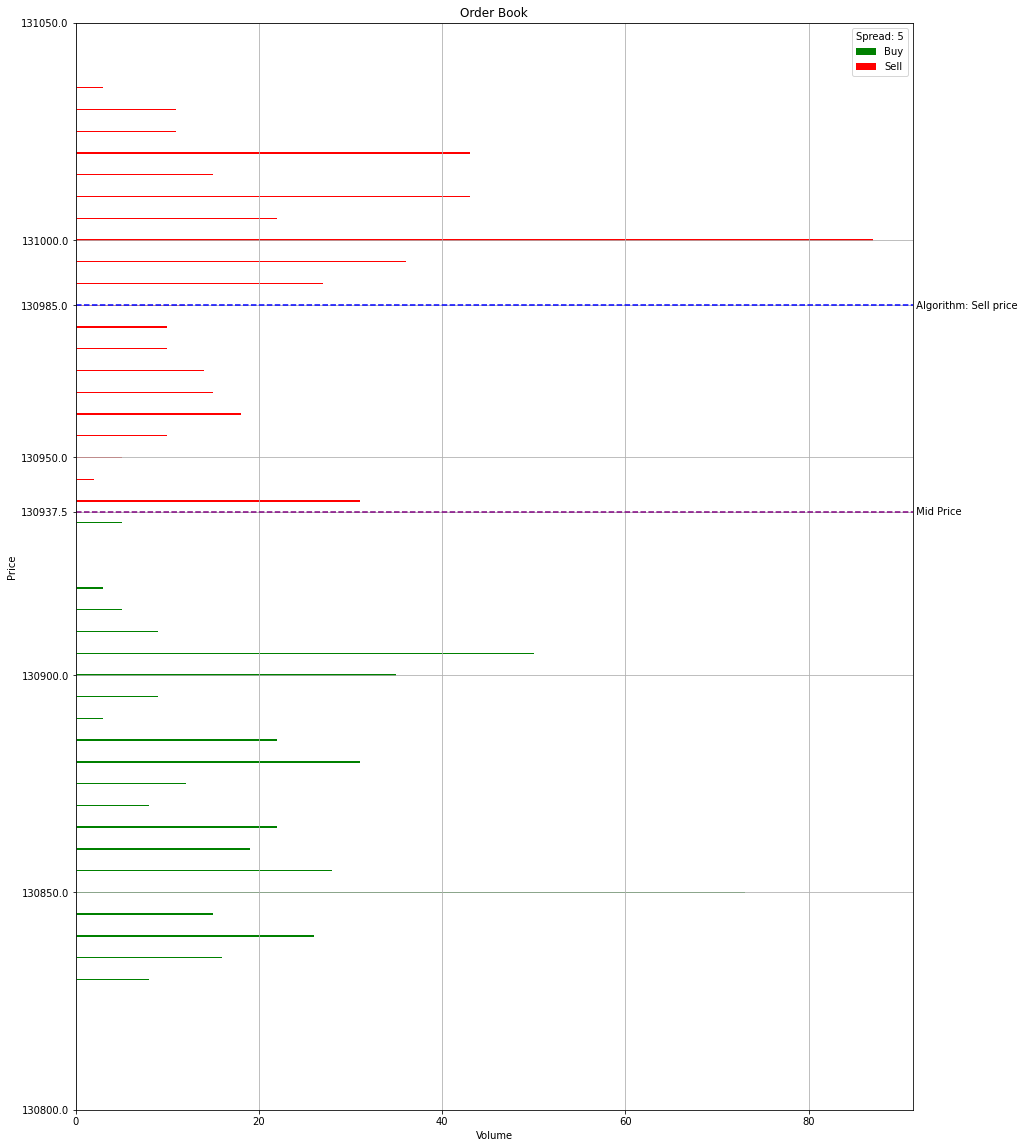

In [5]:
for i in range(5):
    plot_glass(ob[i], prices[i])

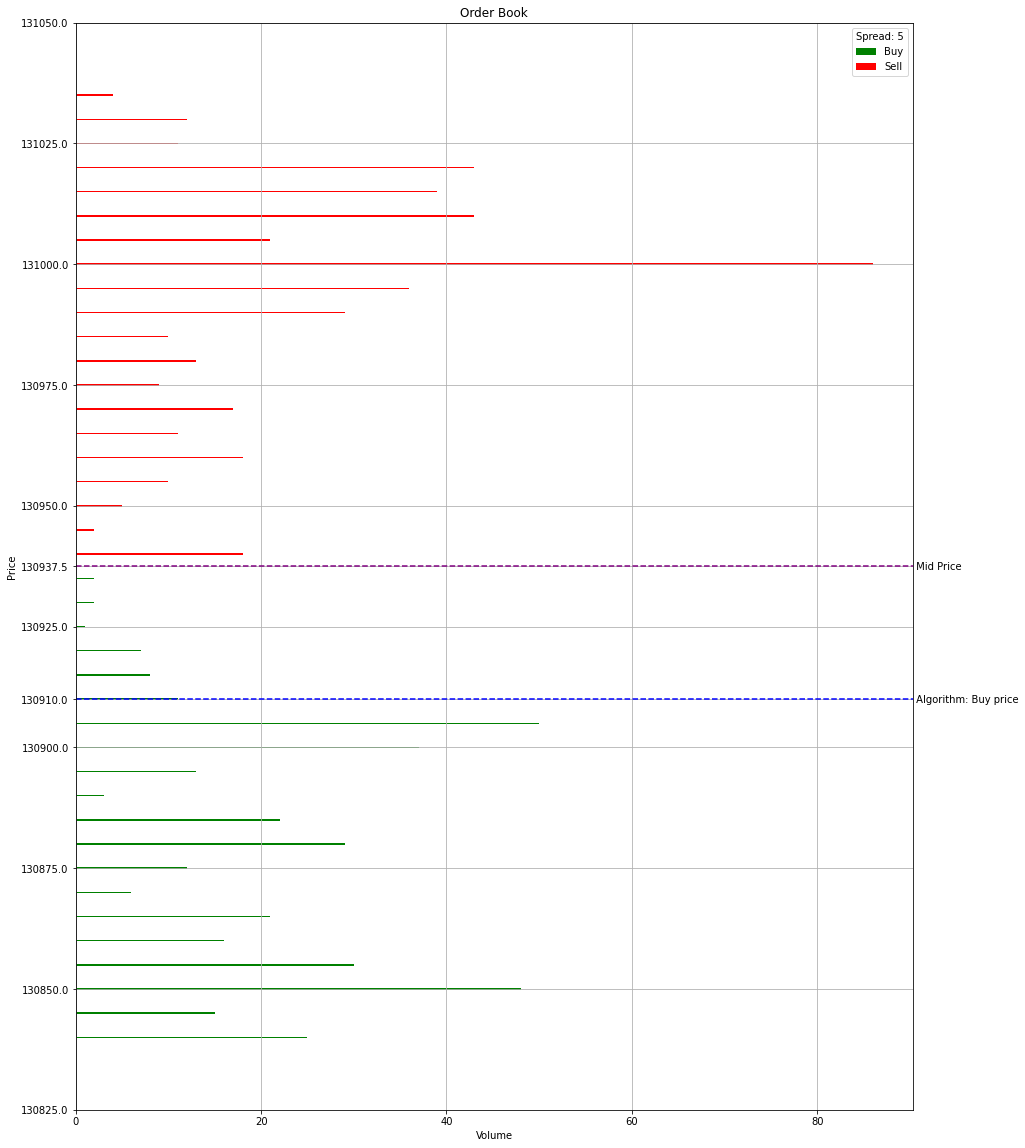

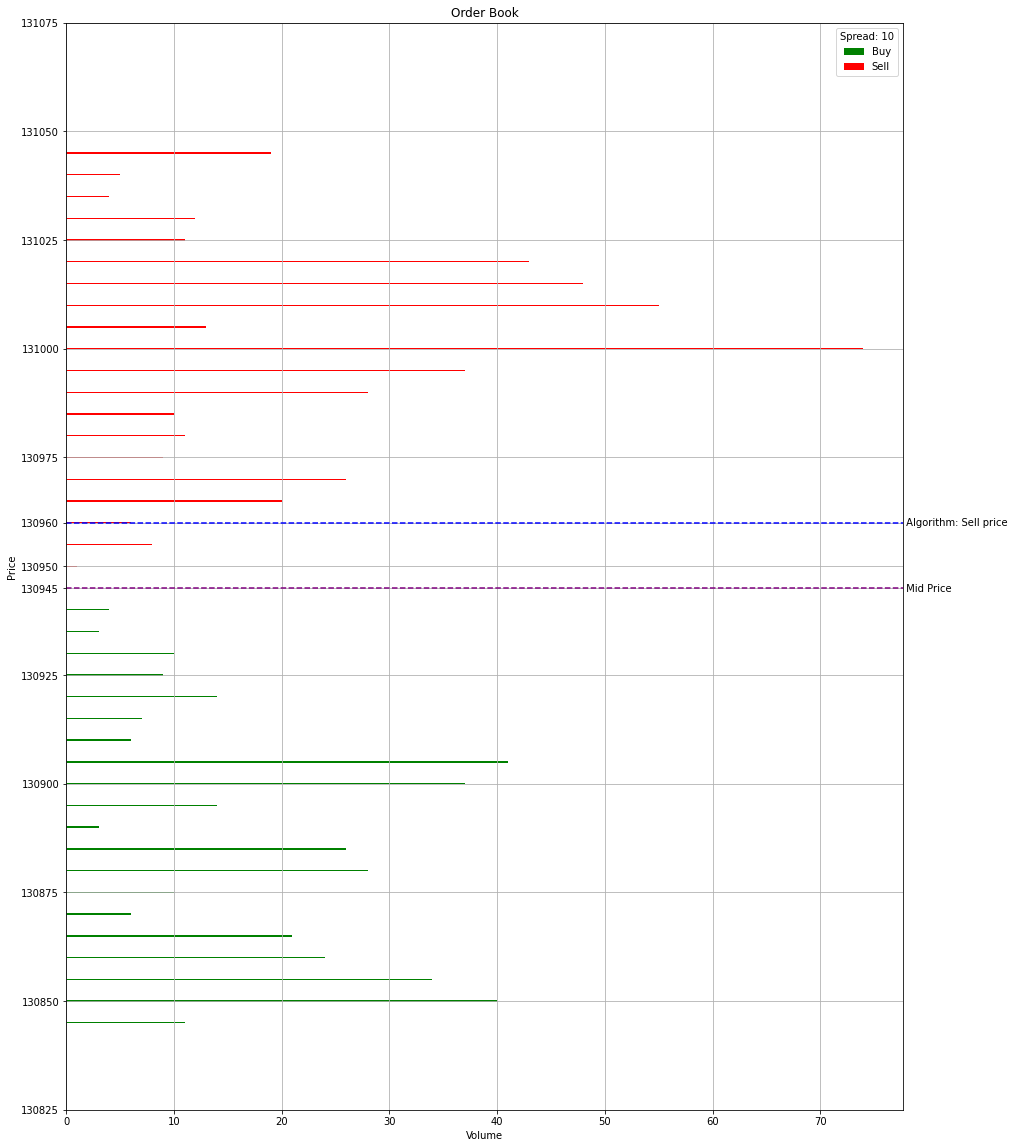

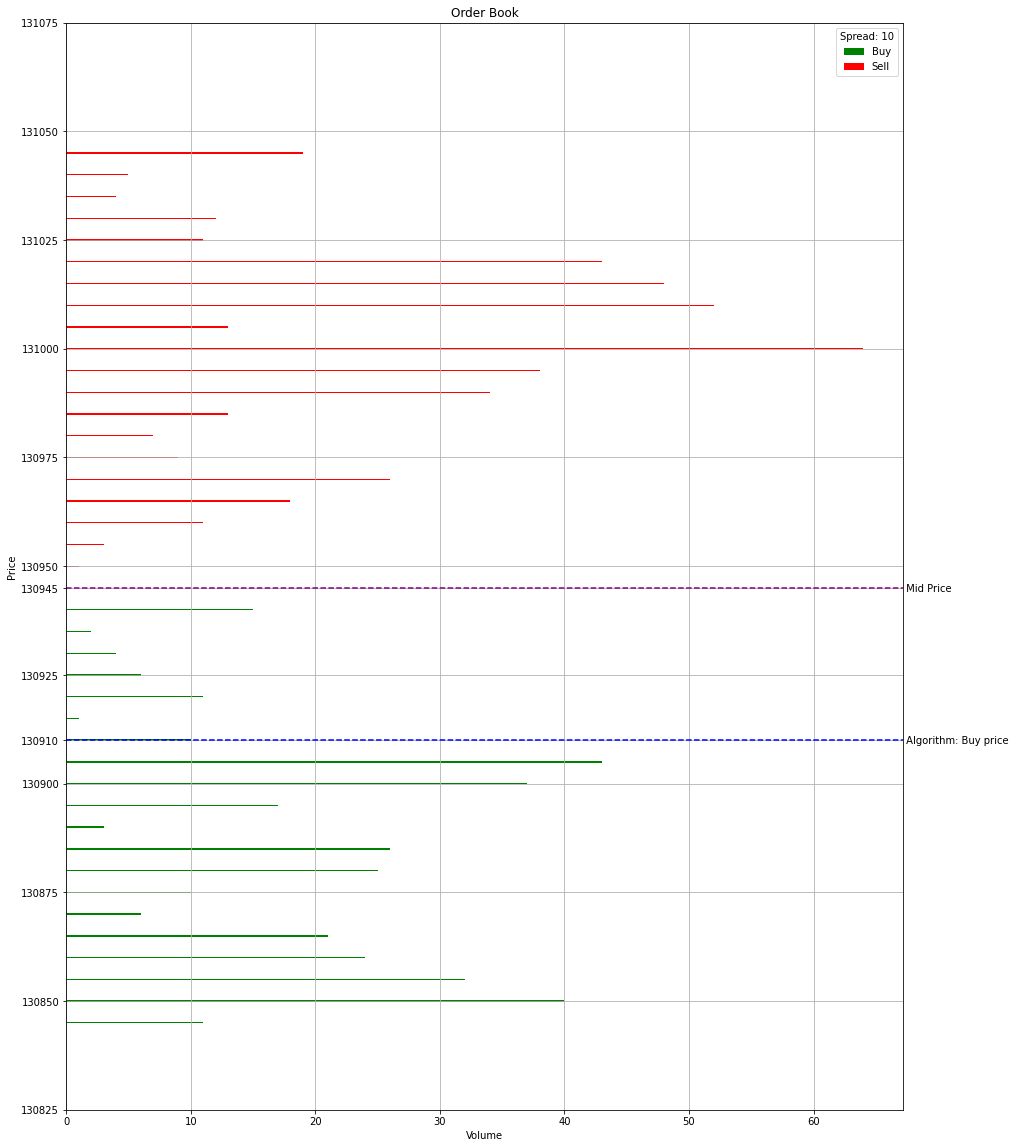

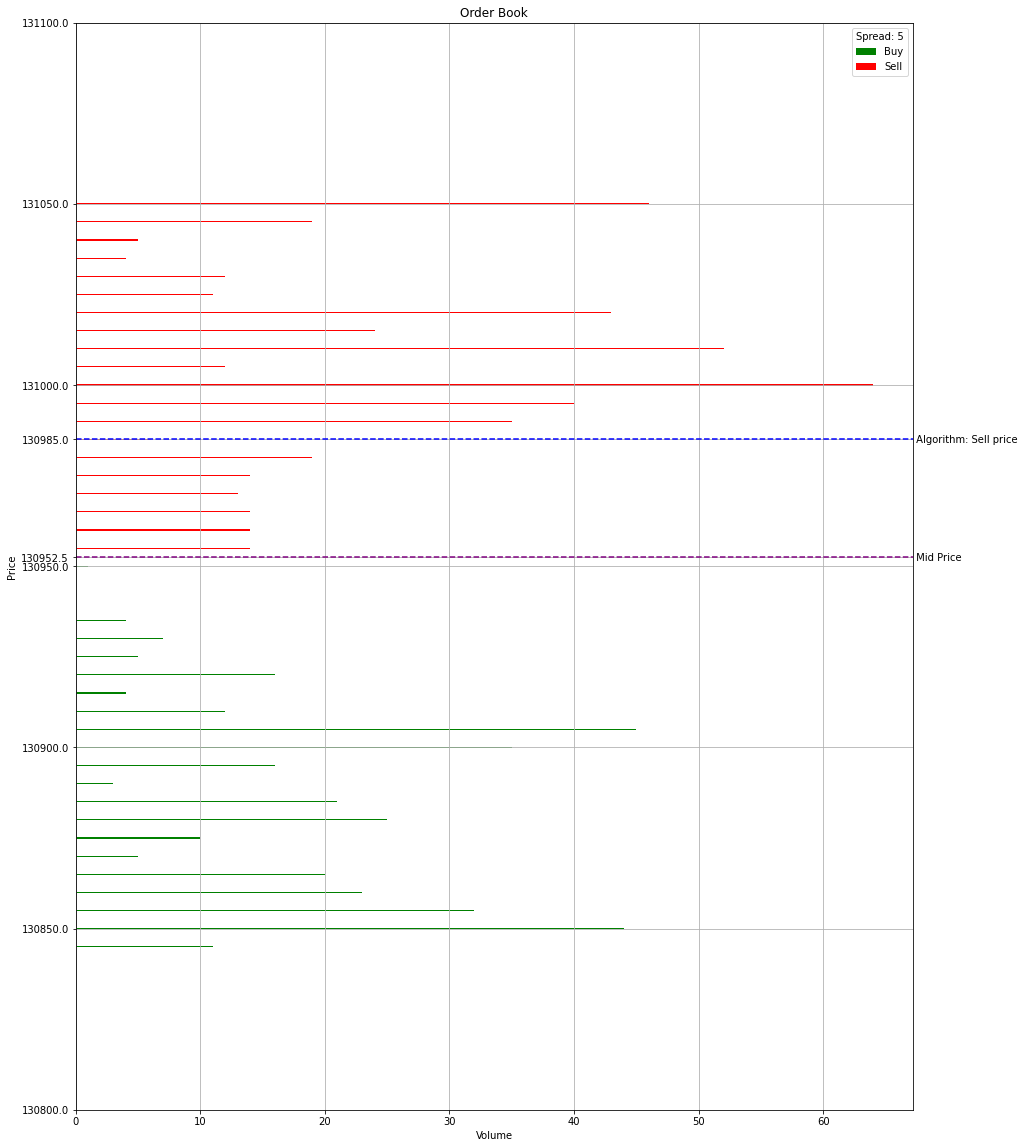

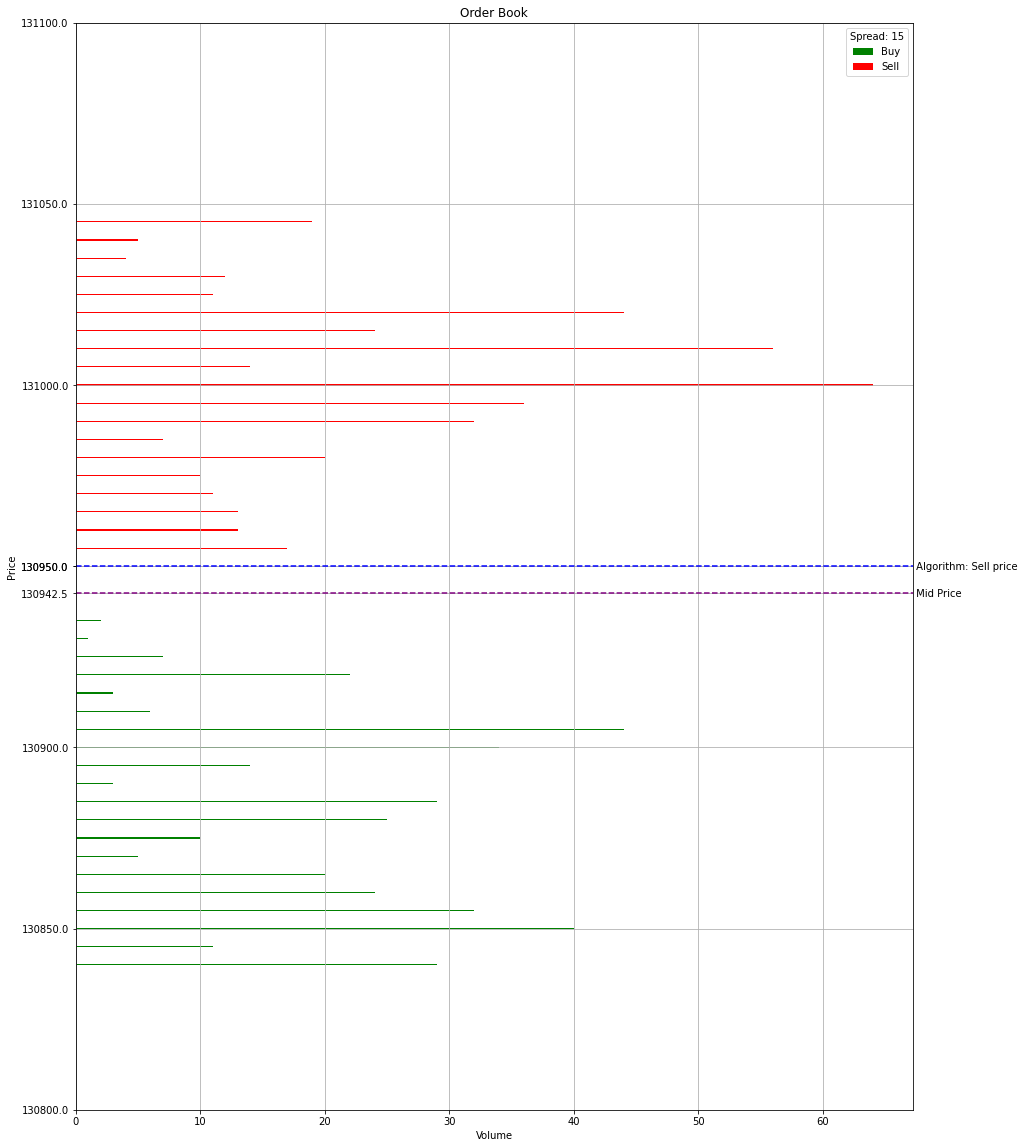

In [34]:
for i in range(5, 10):
    plot_glass(ob[i], prices[i])

In [5]:
from func import calculate_accuracy, spread, mid_price, vwap, market_depth, weighted_midprice, relative_spread, price_range

result = pd.DataFrame()

targets = []
spreads = []
mid_prices = []
vwap_arr = []
market_depths_sell = []
market_depths_buy = []
weighted_midprices = []
relative_spreads = []
price_ranges = []
types = []

for i in range(len(train_ob)):
    local_target = prices[i][1]
    local_spread = spread(train_ob[i])
    local_mid = mid_price(train_ob[i])
    local_vwap = vwap(train_ob[i])
    local_depth_sell = market_depth(train_ob[i], side = 'Sell')
    local_depth_buy = market_depth(train_ob[i], side = 'Buy')
    local_wmid = weighted_midprice(train_ob[i])
    local_rel_sp = relative_spread(train_ob[i])
    local_pricerg = price_range(train_ob[i])
    local_type = train_prices[i][0]


    targets.append(local_target)
    spreads.append(local_spread)
    mid_prices.append(local_mid)
    vwap_arr.append(local_vwap)
    market_depths_sell.append(local_depth_sell)
    market_depths_buy.append(local_depth_buy)
    weighted_midprices.append(local_wmid)
    relative_spreads.append(local_rel_sp)
    price_ranges.append(local_pricerg)
    types.append(local_type)


result['target'] = targets
result['spread'] = spreads
result['mid price'] = mid_prices
result['vwap'] = vwap_arr
result['market depth sell'] = market_depths_sell
result['market depth buy'] = market_depths_buy
result['w mid price'] = weighted_midprices
result['rel spread'] = relative_spreads
result['price range'] = price_ranges
result['type'] = types



result.head()



,target,spread,mid price,vwap,market depth sell,market depth buy,w mid price,rel spread,price range,type
0,130895,5,131942.5,131932.780540,73653410,112107945,131932.780540,0.000038,195,Sell price
1,130900,10,132000.0,131998.320388,61146325,74811945,131998.320388,0.000076,200,Sell price
2,130940,10,131995.0,131981.872475,111450910,117273675,131981.872475,0.000076,200,Sell price
3,130915,40,131550.0,131558.567990,58178535,51146635,131558.567990,0.000304,230,Buy price
4,130985,15,131927.5,131919.670088,58206410,121732020,131919.670088,0.000114,205,Buy price


In [7]:
result[result['type'] == 'Sell price']['spread'].mean()

11.25

In [8]:
result[result['type'] == 'Buy price']['spread'].mean()

11.305555555555555

In [10]:
from func import best_bid, best_ask, spread

counter = 0
for i in range(len(ob)):
    bid0 = best_bid(ob[i])
    ask0 = best_ask(ob[i])
    price = prices[i][1]
    local_spread = spread(ob[i])
    if local_spread < 15:
        if (price <= ask0) and (price >= bid0):
            counter += 1 

print(counter)

0


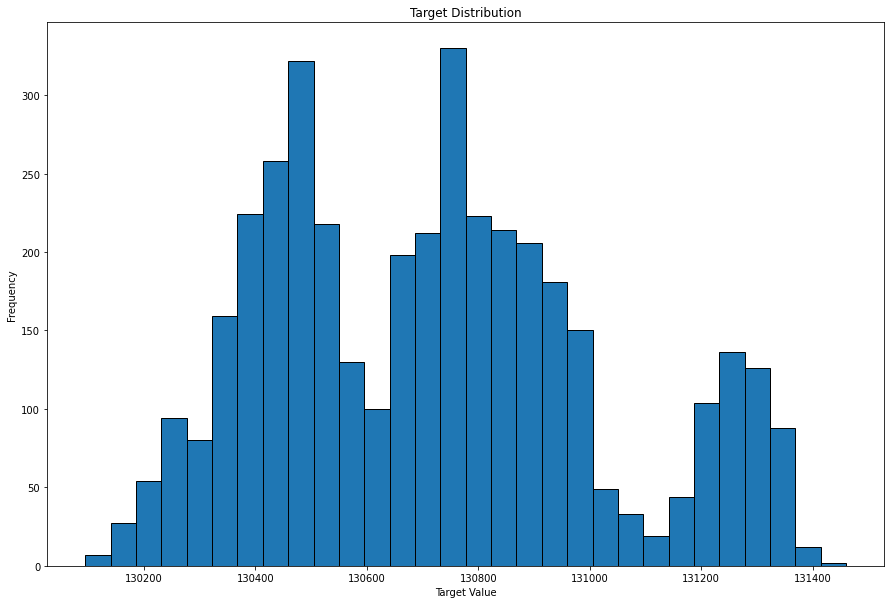

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.hist(result['target'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

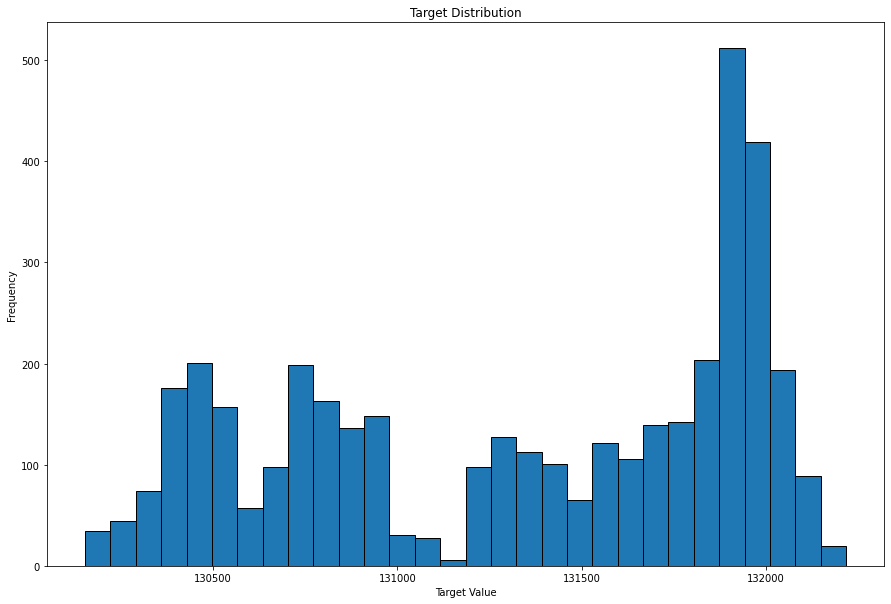

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(result['mid price'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
buy_target = result[result['type'] == 'Buy price']
sell_target = result[result['type'] == 'Sell price']

<AxesSubplot:>

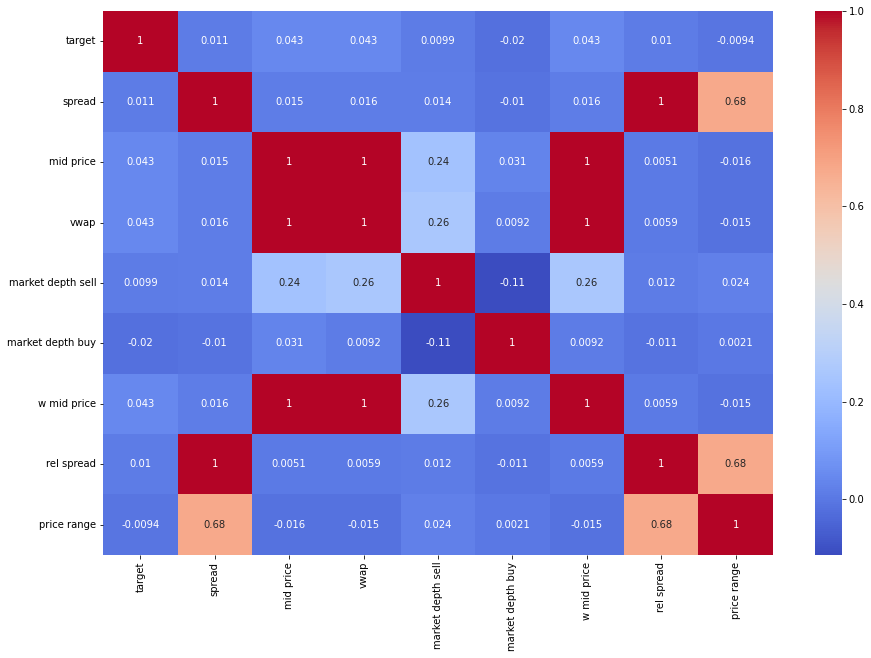

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(buy_target.corr(), annot=True, cmap='coolwarm')

Посмотрим как часто ответ алгоритма не попадает в один из уровней стакана, а также как часто попаает в диапазон спреда или на лучщий аск/бид

In [15]:
from func import best_ask, best_bid
ans  = []

for i in range(len(train_ob)):
    bid_price = best_bid(train_ob[i])
    ask_price = best_ask(train_ob[i])

    left_edge = max([price for price, _, _ in train_ob[i]])
    right_edge = min([price for price, _, _ in train_ob[i]])

    if train_prices[i][1] == bid_price:
        ans.append('on bid')
    elif train_prices[i][1] == ask_price:
        ans.append('on ask')
    elif train_prices[i][1] > left_edge:
        ans.append('more max')   
    elif train_prices[i][1] < right_edge:
        ans.append('less min')
    elif train_prices[i][1] < ask_price and train_prices[i][1] > bid_price:
        ans.append('inside spread') 
    elif train_prices[i][1] not in [tp[0] for tp in train_ob[i]]:
        ans.append('no match')
    else:
        ans.append('regular')

result['ans'] = ans


<AxesSubplot:>

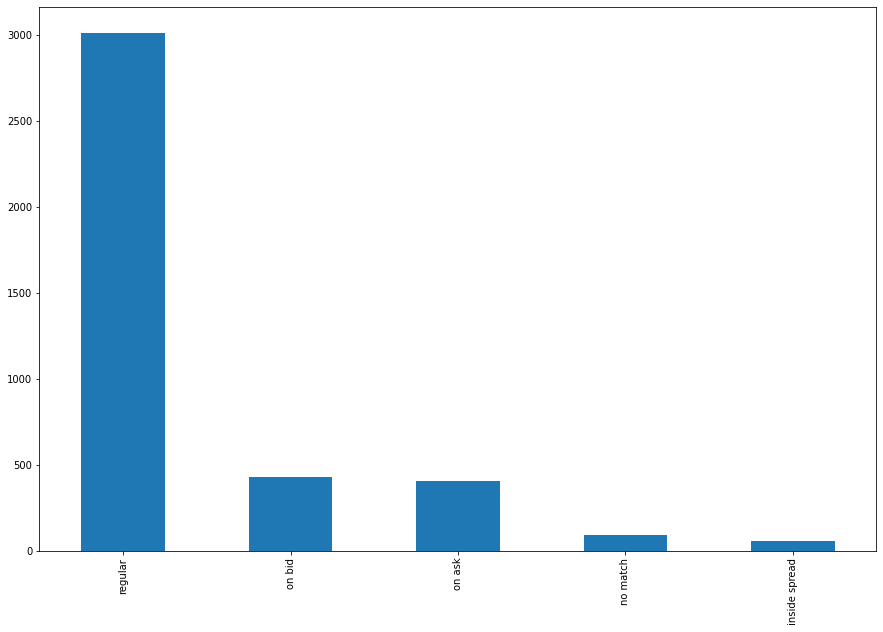

In [16]:
plt.figure(figsize=(15, 10))
result['ans'].value_counts().plot(kind='bar')

видим, что алгоритм никогда не ставит цену, которая выходит за границы стакана, значит надо попытаться понять по какому принципу алгоритм выбирает цену внутри стакана. Алгоритм ставит очень мало цен внутри спреда, давай отрисуем несколько таких стаканов, чтобы посмотреть как они выглядят. 

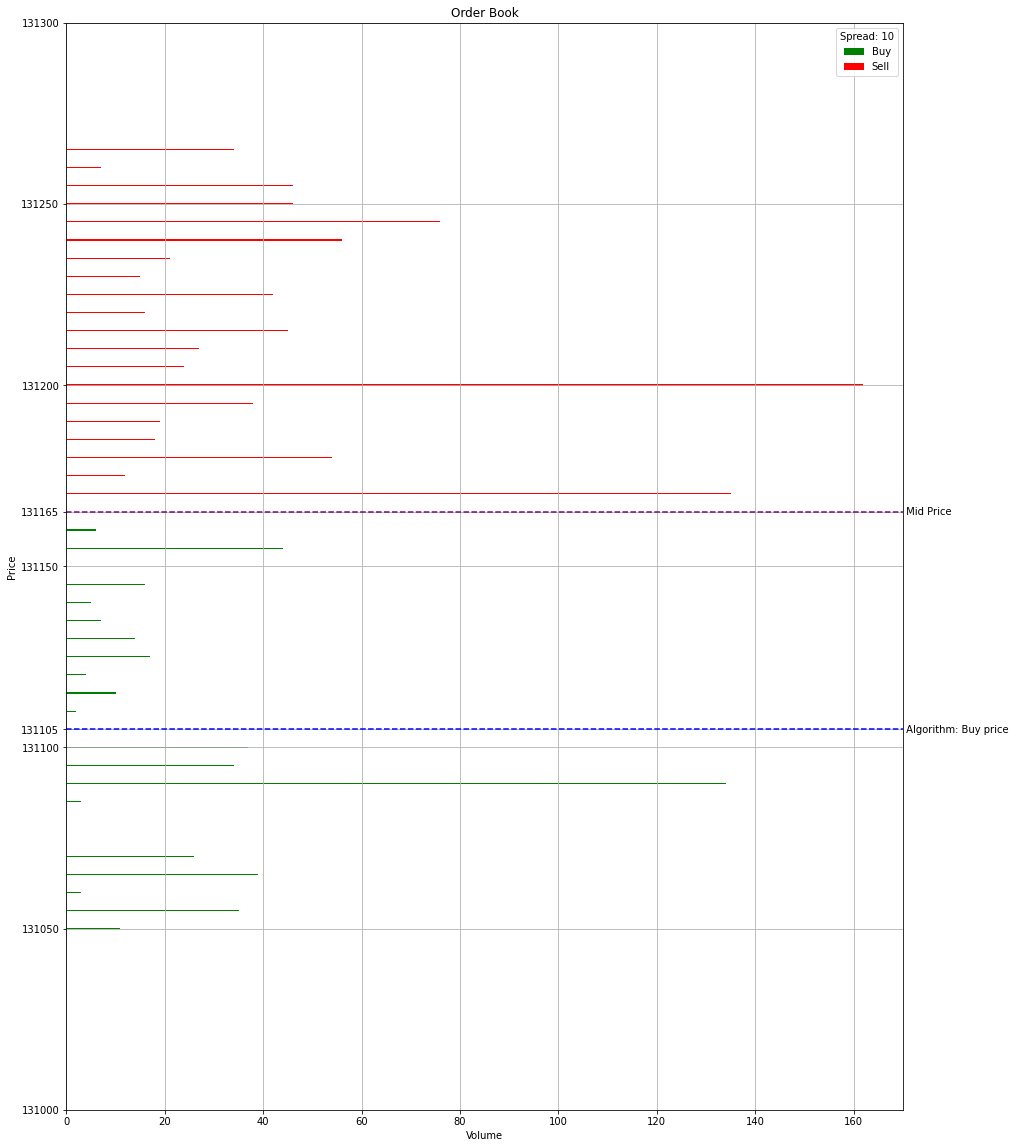

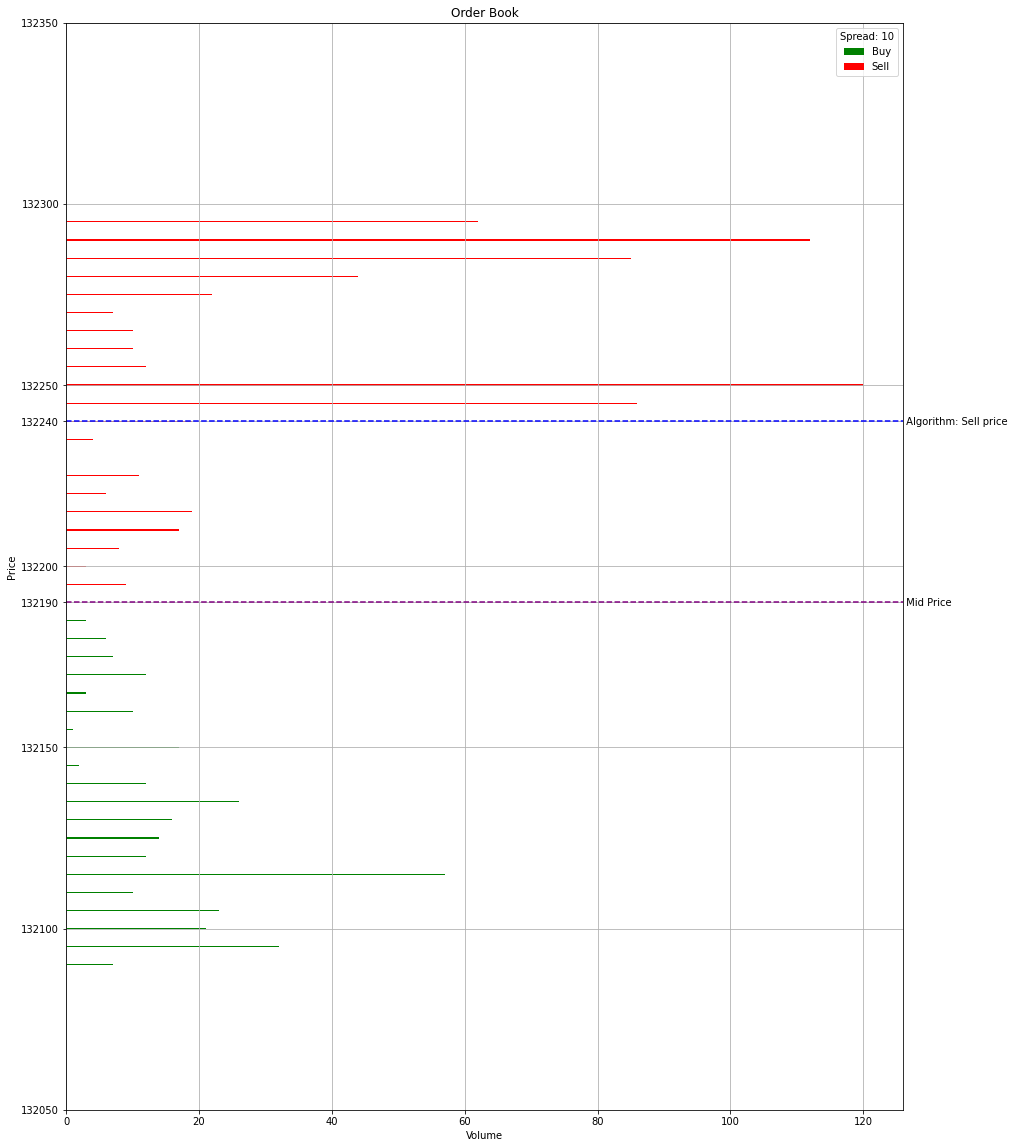

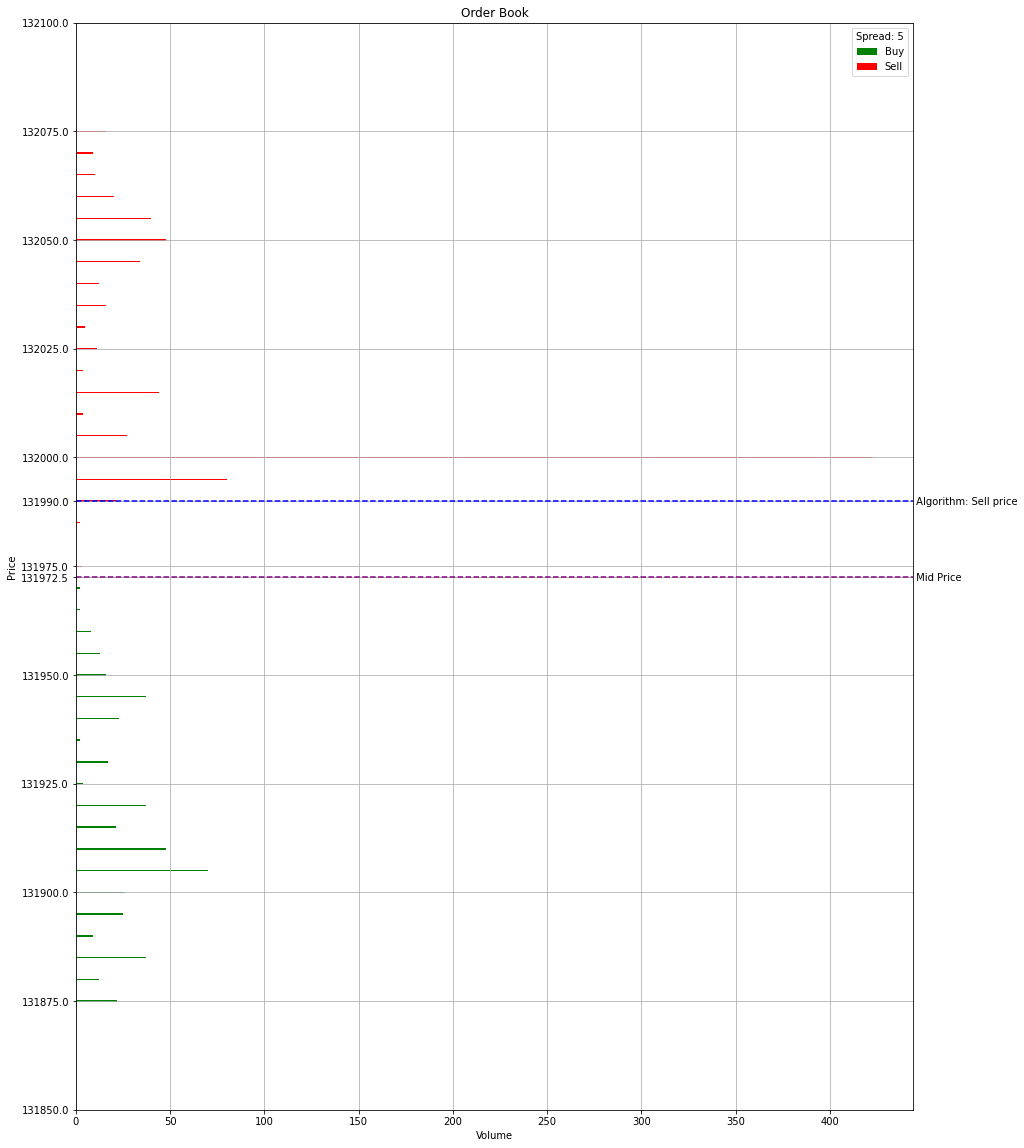

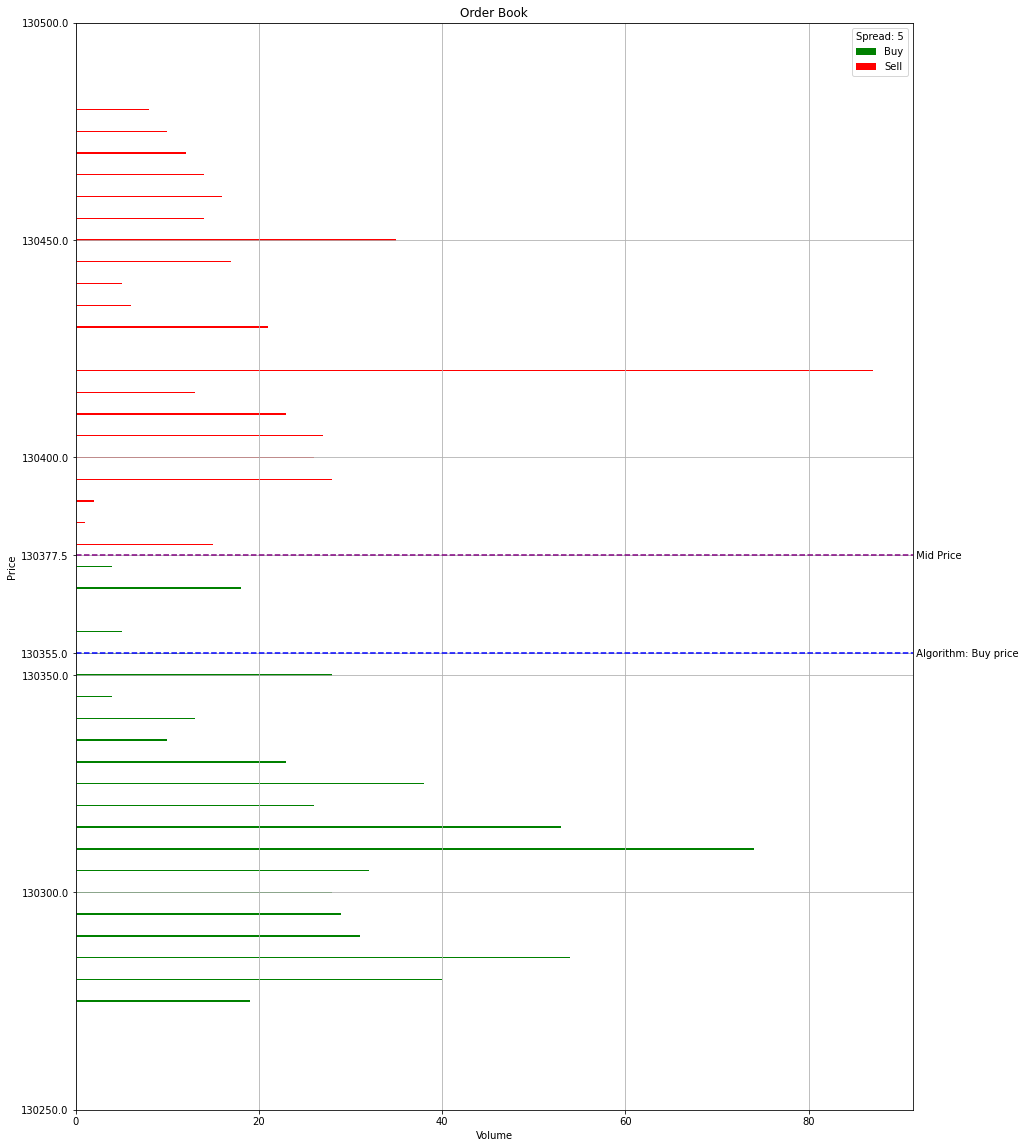

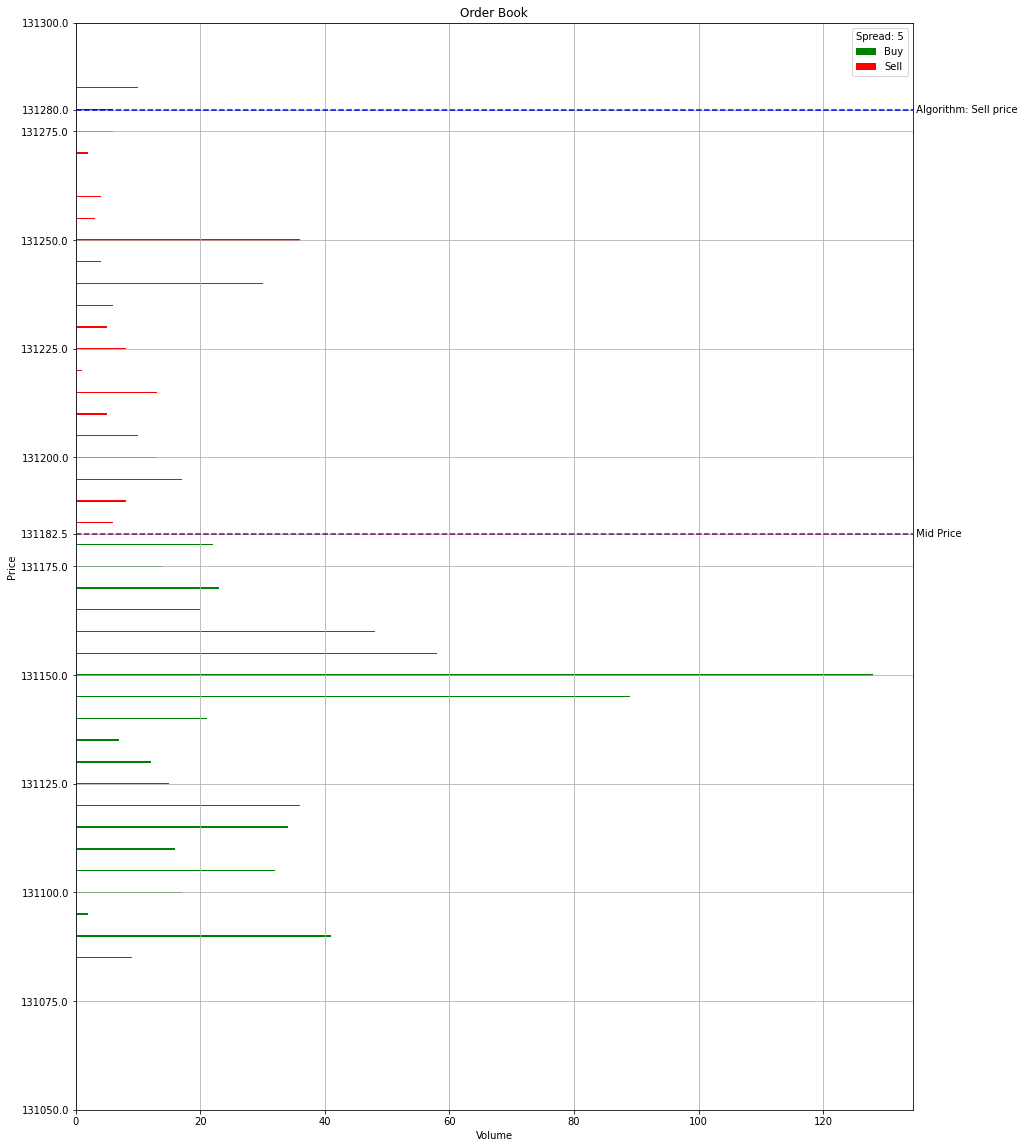

738


In [17]:
%autoreload 2
from func import check_gaps

counter = 0

local_df = result[result['ans'] == 'regular']

for i in local_df.index:
    side = train_prices[i][0].split()[0]
    if not check_gaps(train_ob[i], side):
        if counter < 5:
            plot_glass(train_ob[i], train_prices[i])
        counter += 1
print(counter)


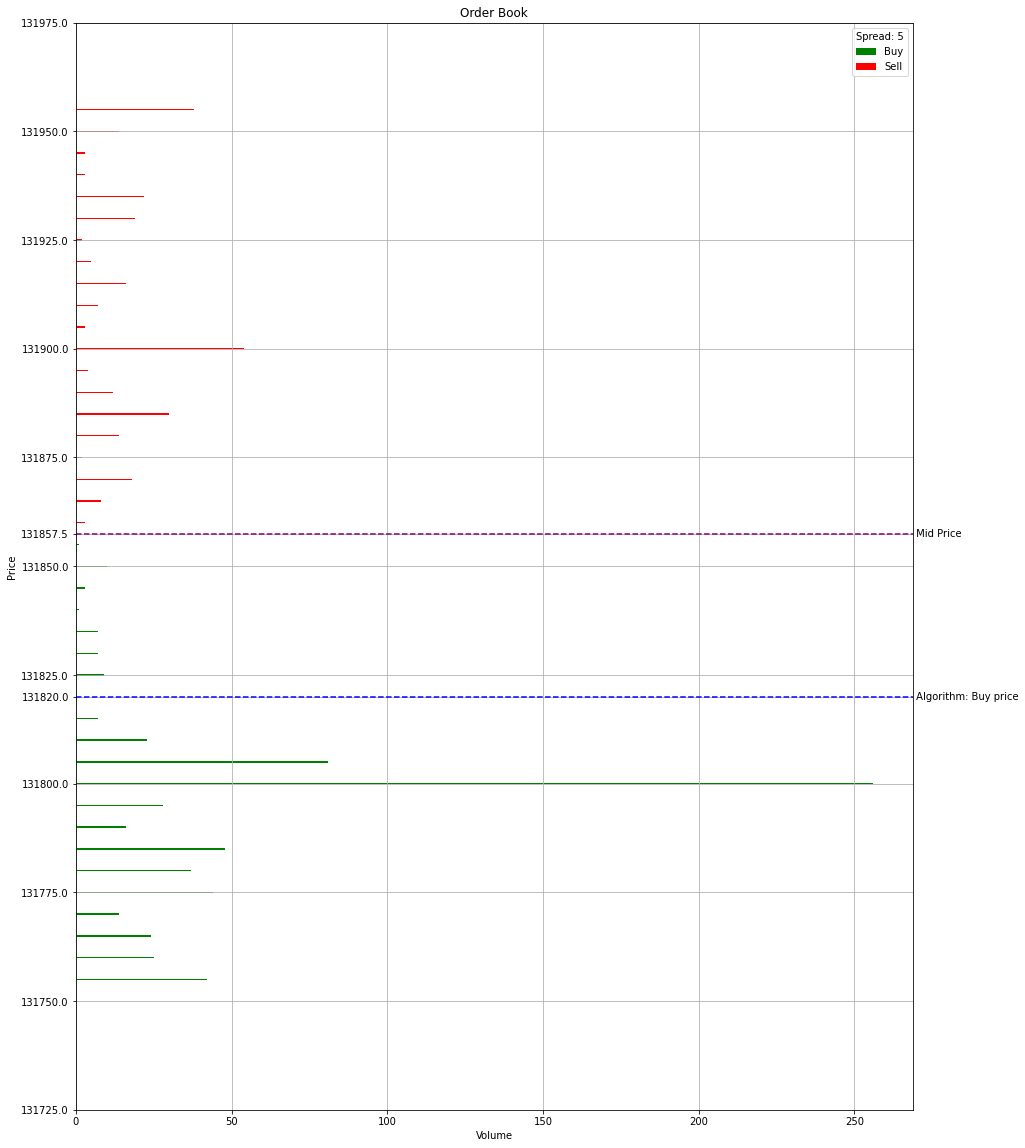

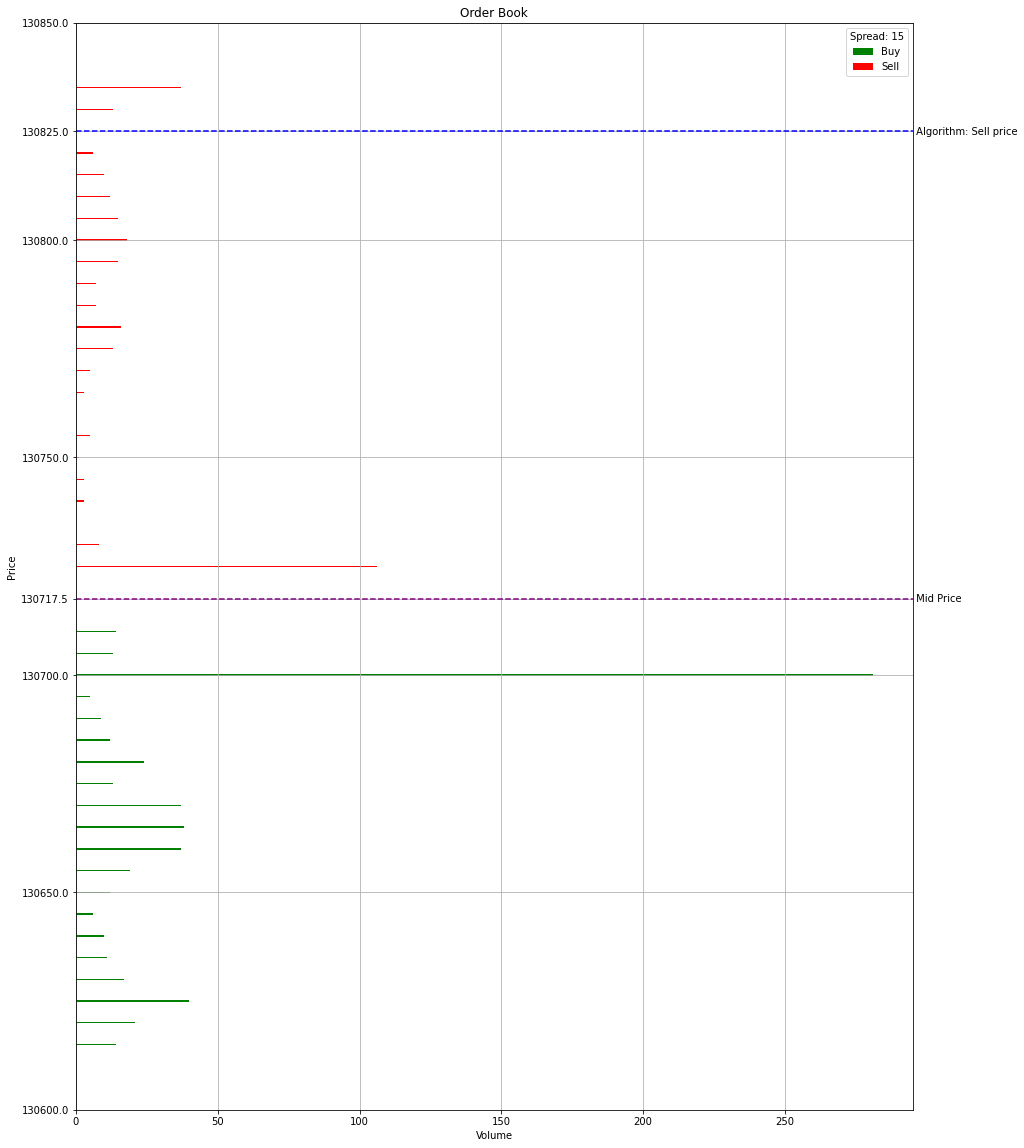

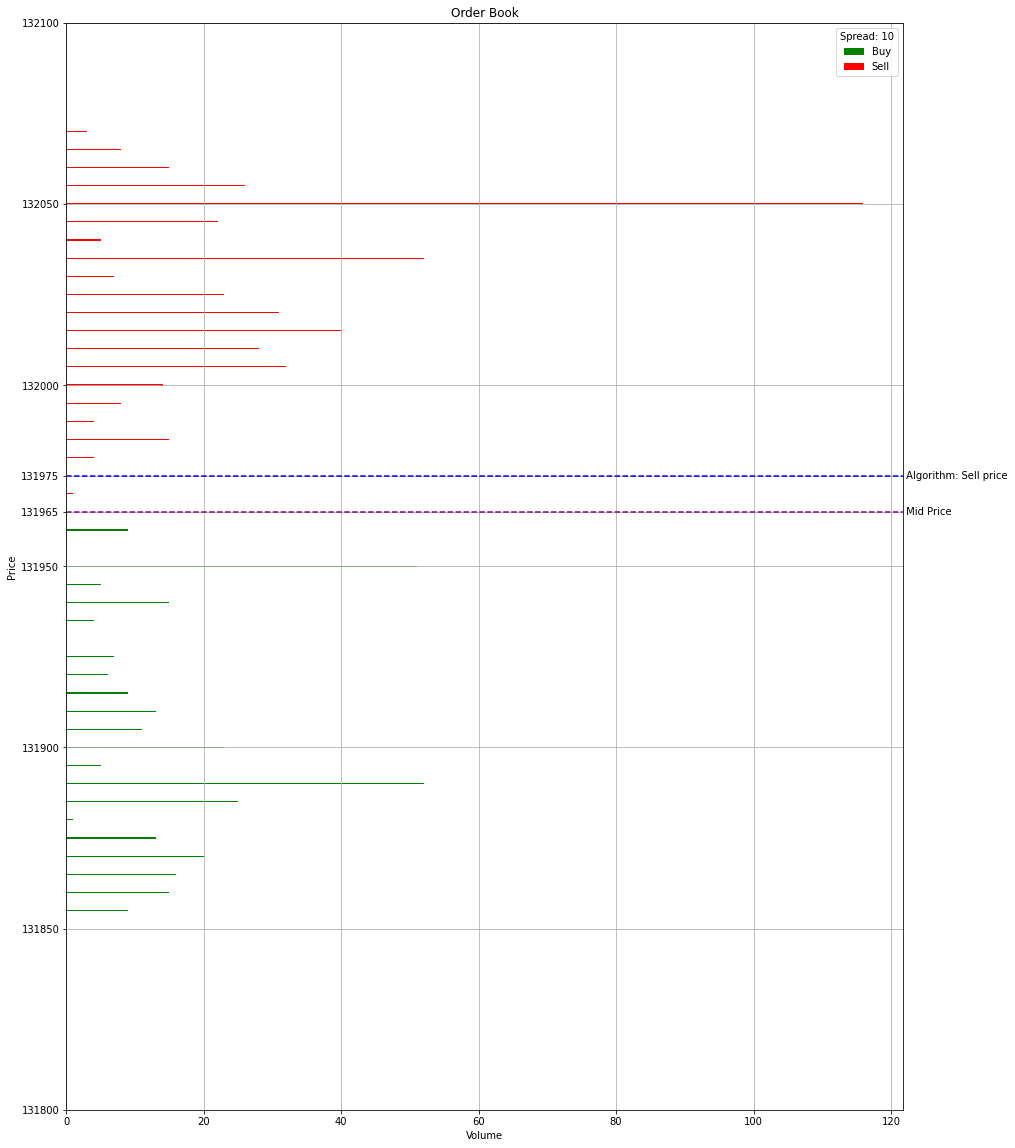

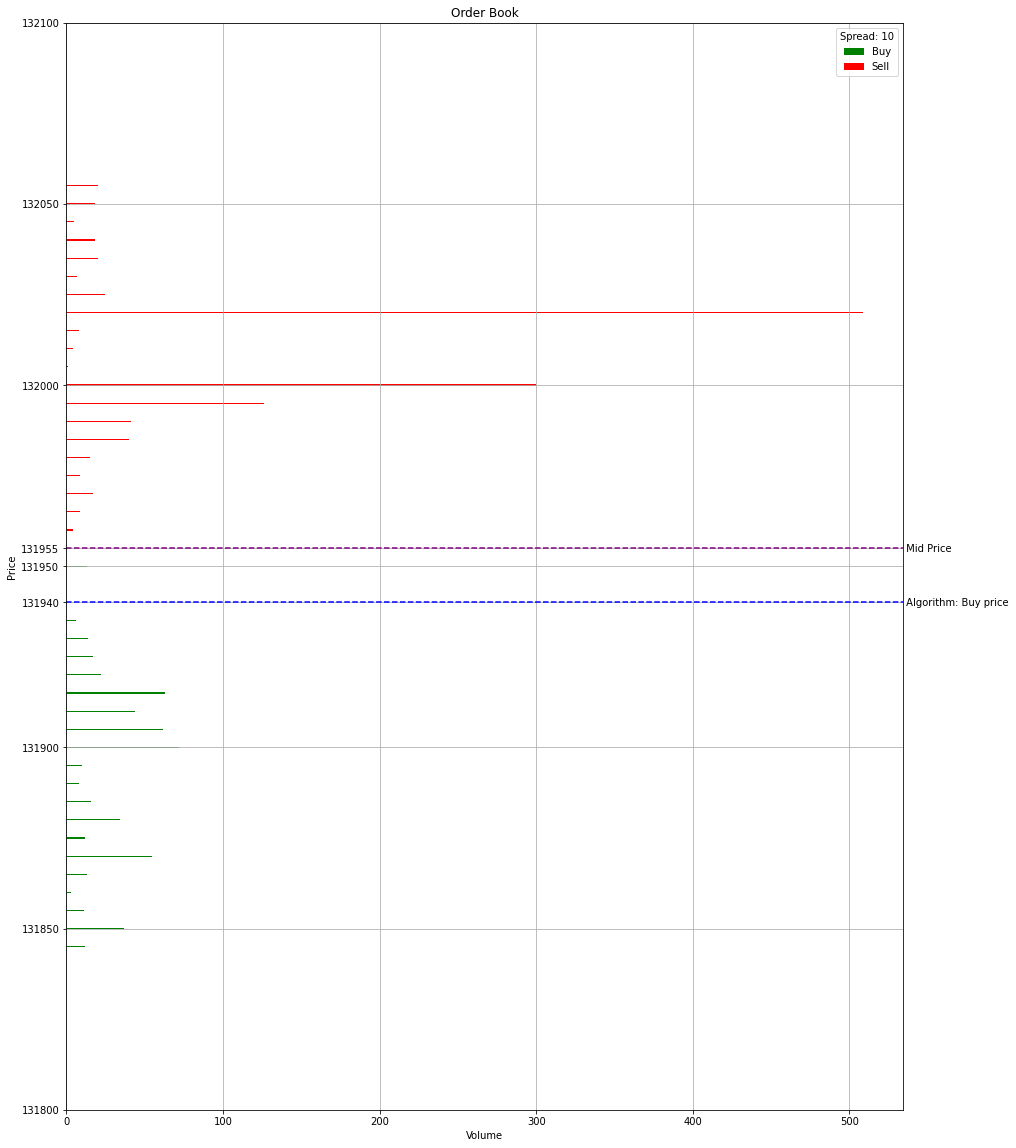

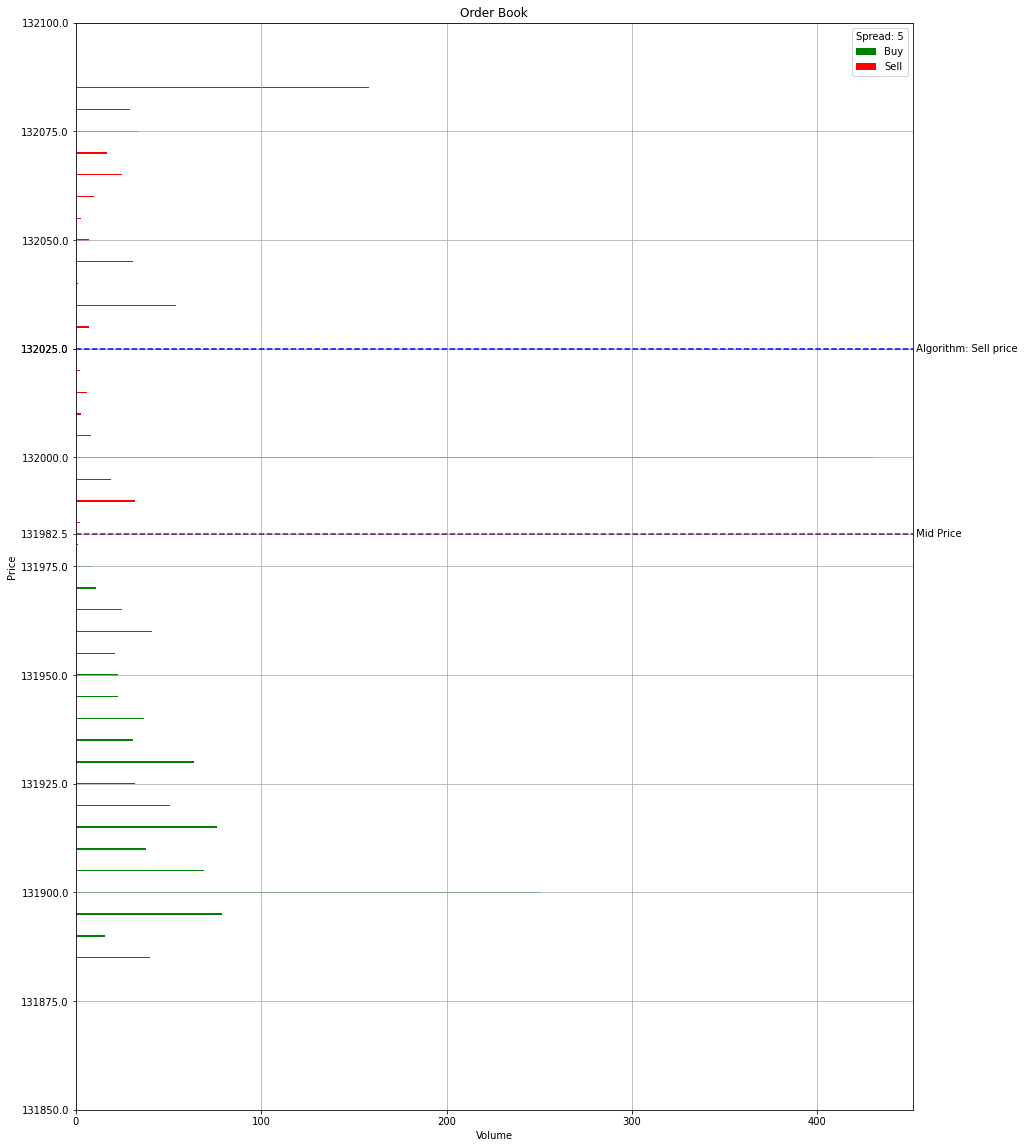

In [44]:
i = 0
counter = 0
while counter < 5:
    local_df = result.values
    if local_df[i][-1] == 'no match': 
        plot_glass(train_ob[i], train_prices[i])
        counter += 1
    i += 1

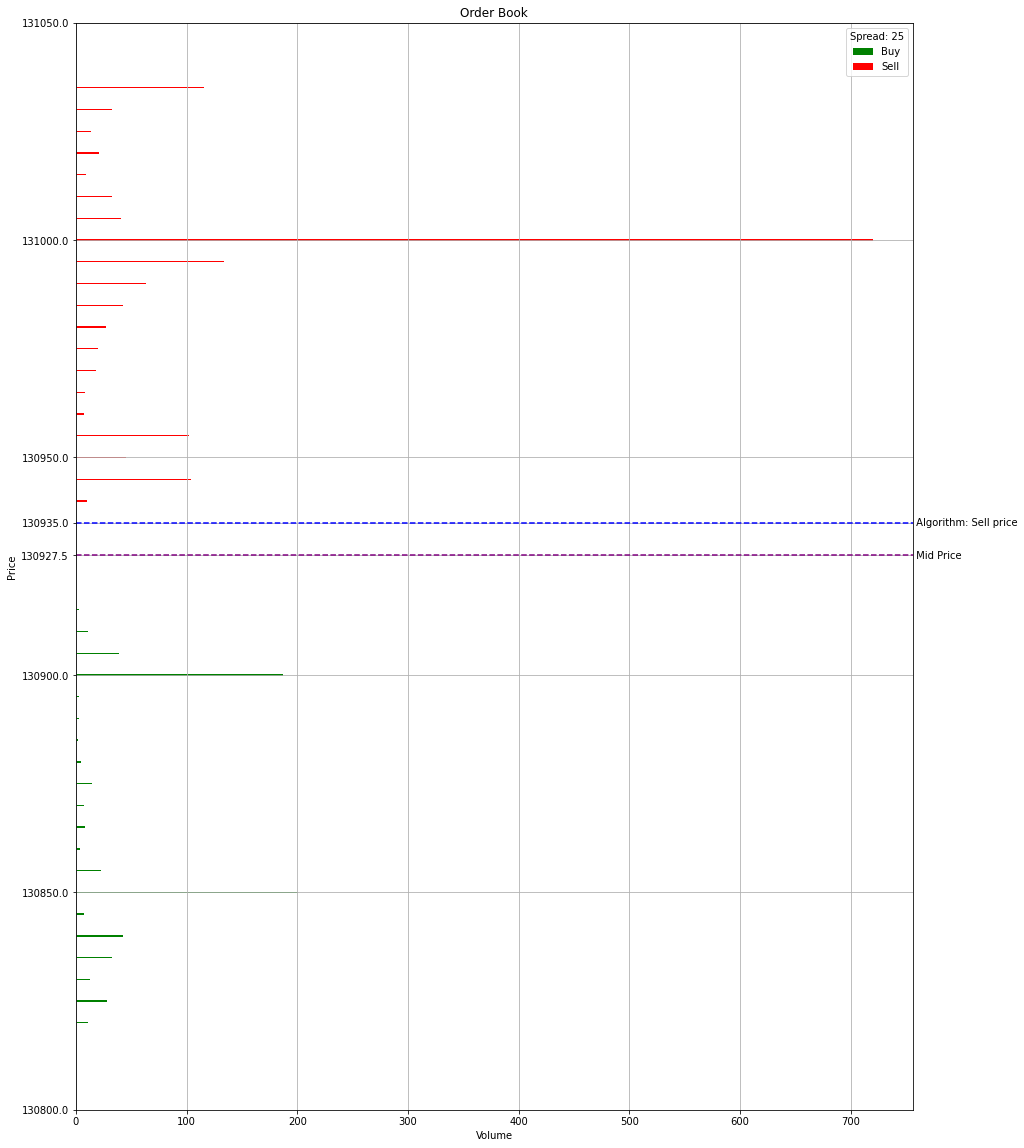

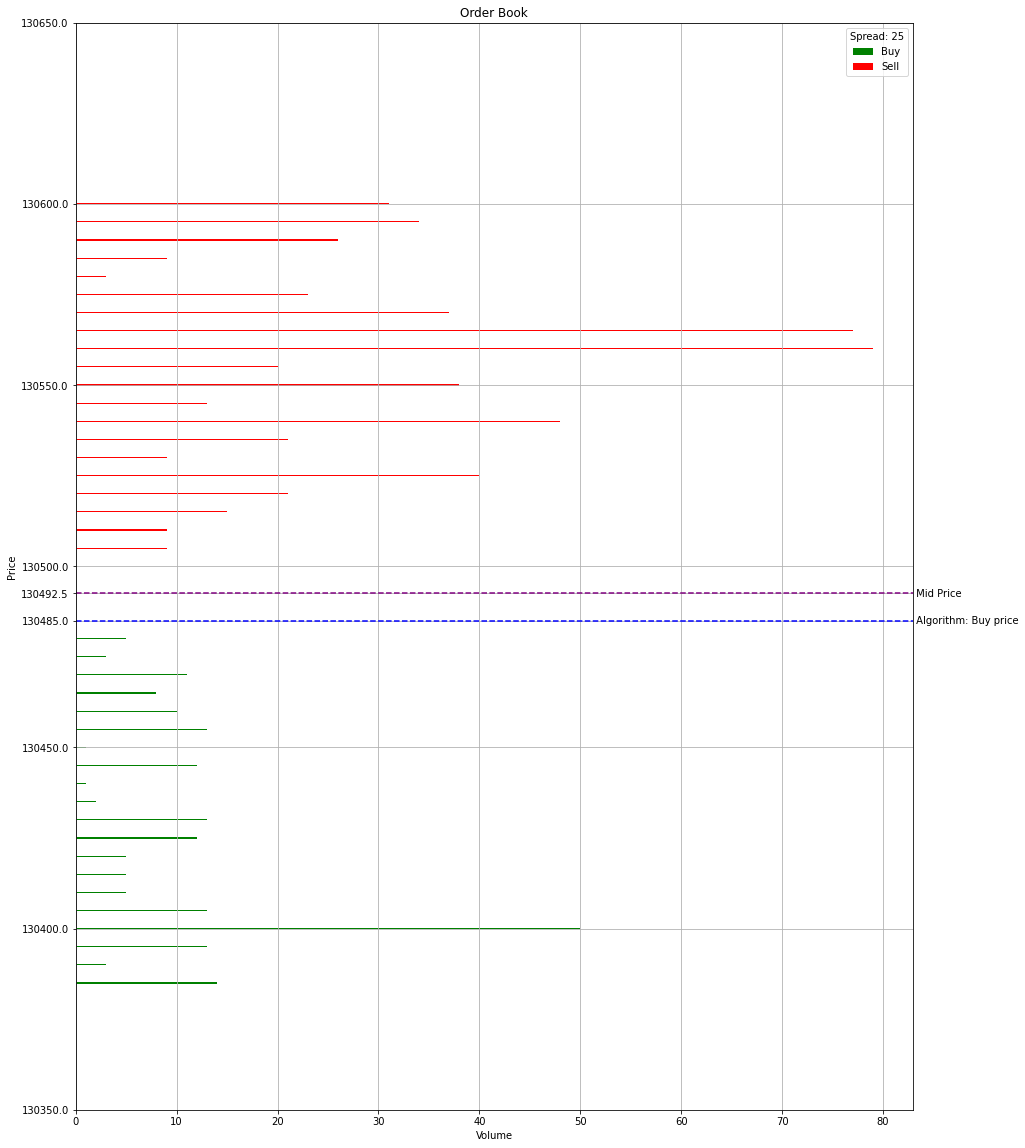

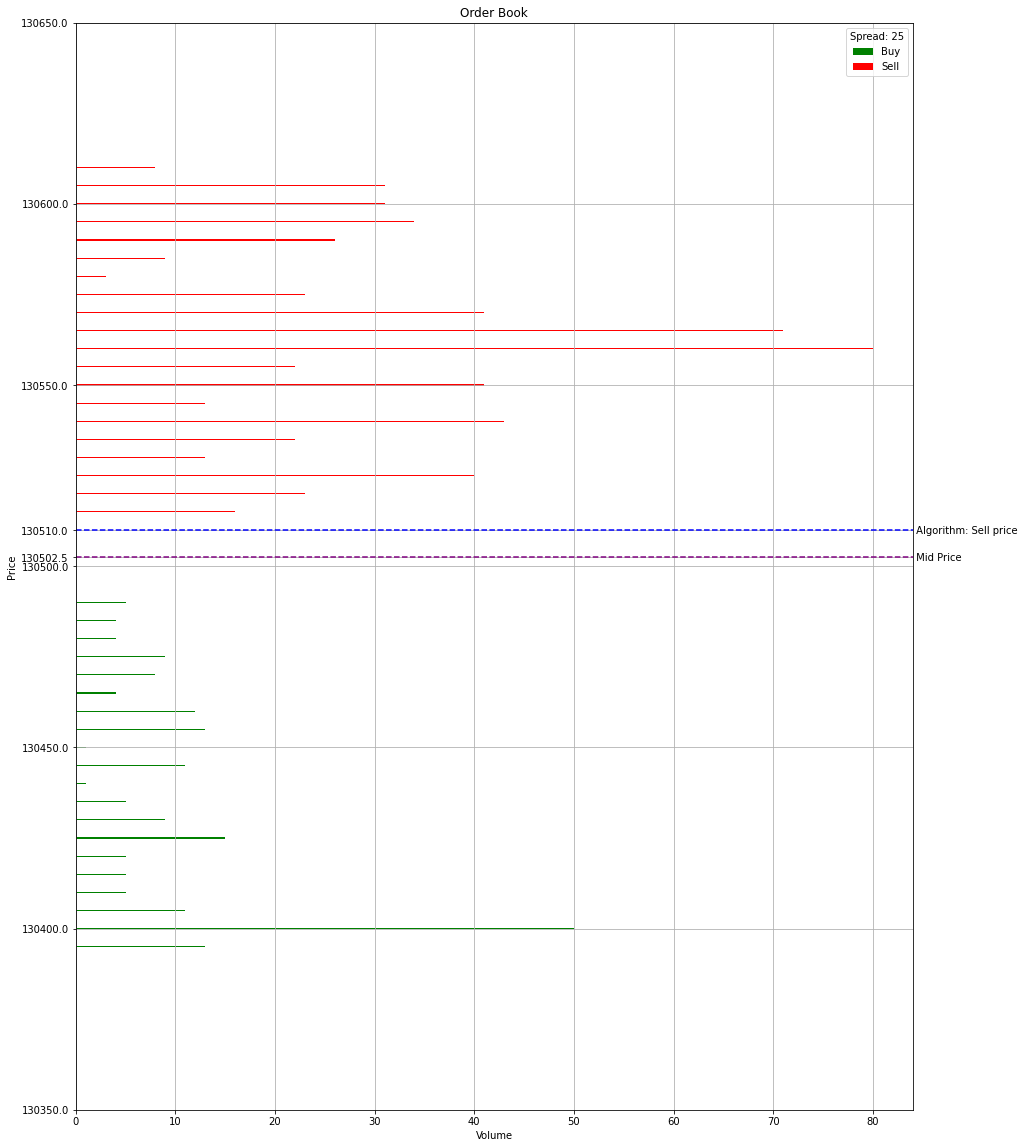

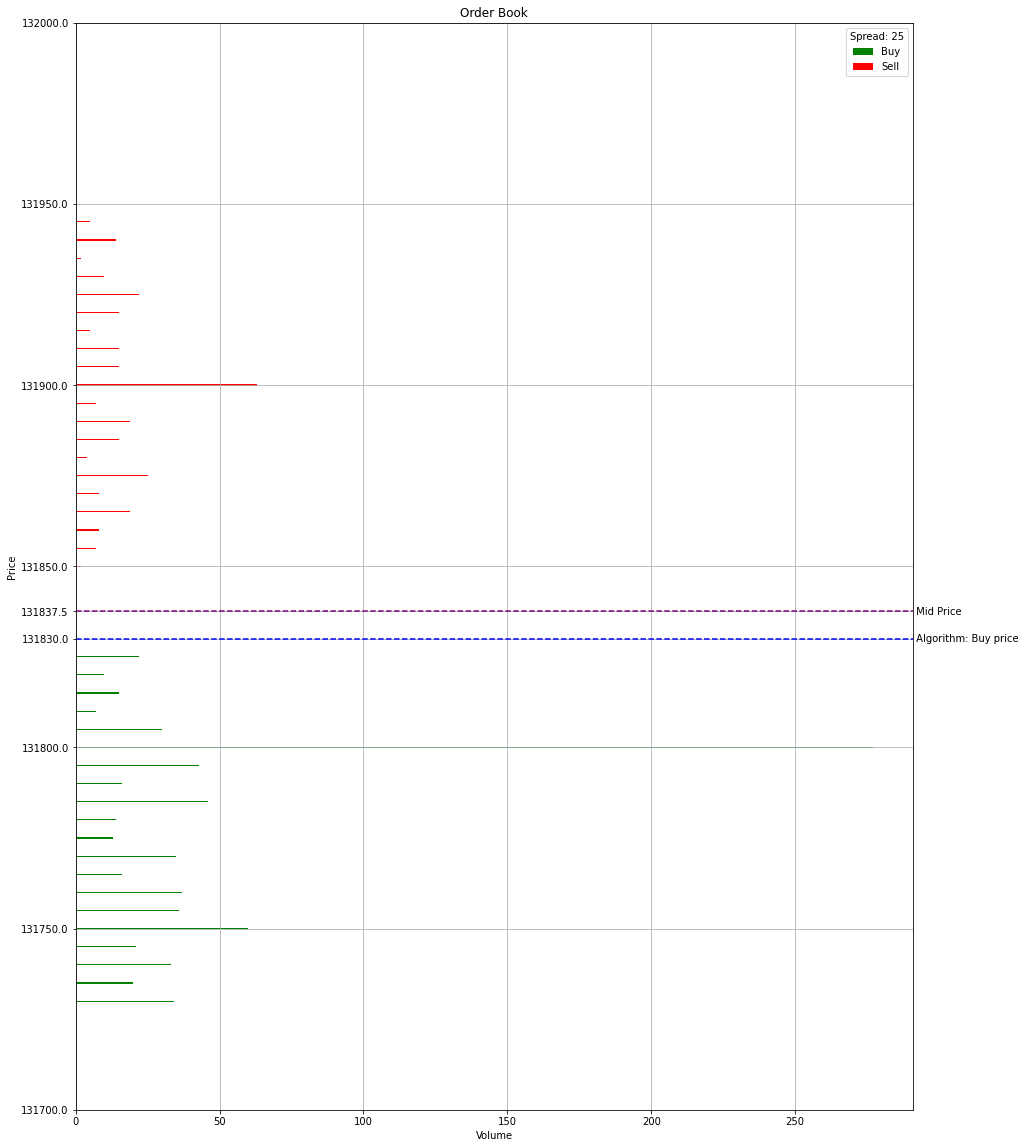

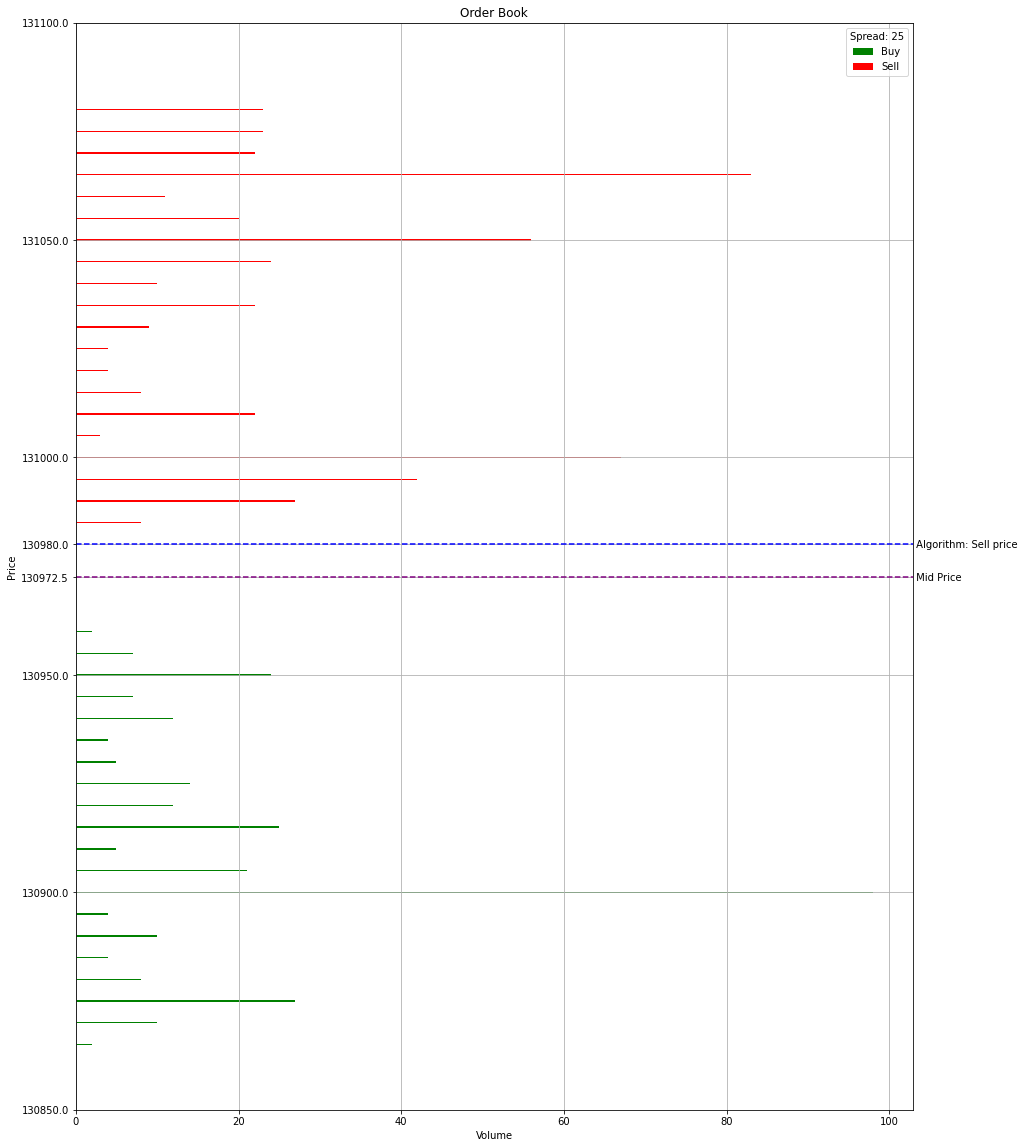

In [45]:
i = 0
counter = 0
while counter < 5:
    local_df = result.values
    if local_df[i][-1] == 'inside spread': 
        plot_glass(train_ob[i], train_prices[i])
        counter += 1
    i += 1

In [261]:
import matplotlib.pyplot as plt
import numpy as np

def plot_orderbook(orderbook, sell_price_tuple):
    # Split the orderbook into asks and bids
    asks = [x for x in orderbook if x[2] == 'Sell']
    bids = [x for x in orderbook if x[2] == 'Buy']
    spread_local = spread(orderbook) 
    print(spread_local)
    # Compute the volume-weighted price for each level
    ask_prices = [x[0] for x in asks]
    bid_prices = [x[0] for x in bids]

    ask_volumes = [x[1] for x in asks]
    bid_volumes = [x[1] for x in bids]
    ask_vwp = [a*b for a, b in zip(ask_prices, ask_volumes)]
    bid_vwp = [a*b for a, b in zip(bid_prices, bid_volumes)]

    ask_weights = np.array(ask_volumes) / sum(ask_volumes)
    bid_weights = np.array(bid_volumes) / sum(bid_volumes)

    best_ask_price = min(ask_prices)
    best_bid_price = max(bid_prices)

    # Apply weighting based on distance from best price
    # We add a small constant in the denominator to avoid division by zero
    # ask_weights = [1/(abs(best_ask_price - a) + 2) for a in ask_prices]
    # bid_weights = [1/(abs(b - best_bid_price) + 2) for b in bid_prices]
    # plt.bar(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    # plt.bar(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    ask_vwp_weighted = [a*b for a, b in zip(ask_vwp, ask_weights)]
    bid_vwp_weighted = [a*b for a, b in zip(bid_vwp, bid_weights)]

    plt.figure(figsize=(15, 10))
    print(ask_vwp_weighted[::-1])
    print(bid_vwp_weighted)

    print('Cum')

    ask_cumsum = np.cumsum(ask_vwp_weighted[::-1])
    bid_cumsum = np.cumsum(bid_vwp_weighted)

    print(["{:.0f}".format(num) for num in ask_cumsum])
    print(["{:.0f}".format(num) for num in bid_cumsum])

    print('Volumes')

    print(ask_volumes)
    print(bid_volumes)

    
    plt.plot(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    plt.plot(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    plt.plot(ask_prices[::-1], ask_cumsum, color='r', alpha=0.5, linestyle=':', label='Asks Cumulative')
    plt.plot(bid_prices, bid_cumsum, color='g', alpha=0.5, linestyle=':', label='Bids Cumulative')
    
    for i, txt in enumerate(ask_vwp_weighted):
        plt.text(ask_prices[i], txt, str(19 - i), fontsize=8)
    for i, txt in enumerate(bid_vwp_weighted):
        plt.text(bid_prices[i], txt, str(i), fontsize=8)
    # Mark the sell price
    if sell_price_tuple[0].split()[1] == 'Sell':
        plt.axvline(x=sell_price_tuple[1], color='r', linestyle='--', label='Sell price')
    else:
        plt.axvline(x=sell_price_tuple[1], color='g', linestyle='--', label='Buy price')

    plt.xlabel('Price')
    plt.ylabel('Volume-Weighted Price')
    plt.legend()
    plt.show()

In [411]:
ob[5]

[(131035, 4, 'Sell'),
 (131030, 12, 'Sell'),
 (131025, 11, 'Sell'),
 (131020, 43, 'Sell'),
 (131015, 39, 'Sell'),
 (131010, 43, 'Sell'),
 (131005, 21, 'Sell'),
 (131000, 86, 'Sell'),
 (130995, 36, 'Sell'),
 (130990, 29, 'Sell'),
 (130985, 10, 'Sell'),
 (130980, 13, 'Sell'),
 (130975, 9, 'Sell'),
 (130970, 17, 'Sell'),
 (130965, 11, 'Sell'),
 (130960, 18, 'Sell'),
 (130955, 10, 'Sell'),
 (130950, 5, 'Sell'),
 (130945, 2, 'Sell'),
 (130940, 18, 'Sell'),
 (130935, 2, 'Buy'),
 (130930, 2, 'Buy'),
 (130925, 1, 'Buy'),
 (130920, 7, 'Buy'),
 (130915, 8, 'Buy'),
 (130910, 11, 'Buy'),
 (130905, 50, 'Buy'),
 (130900, 37, 'Buy'),
 (130895, 13, 'Buy'),
 (130890, 3, 'Buy'),
 (130885, 22, 'Buy'),
 (130880, 29, 'Buy'),
 (130875, 12, 'Buy'),
 (130870, 6, 'Buy'),
 (130865, 21, 'Buy'),
 (130860, 16, 'Buy'),
 (130855, 30, 'Buy'),
 (130850, 48, 'Buy'),
 (130845, 15, 'Buy'),
 (130840, 25, 'Buy')]

35
[173050.8849557522, 763183.6725663717, 235559.5501474926, 1200149.8230088495, 130000.38348082596, 1592565.766961652, 581777.1017699116, 69431.26843657818, 76935.10324483775, 355646.1504424779, 355659.78613569326, 140230.35398230088, 9425.995575221239, 140241.10619469028, 69449.9041297935, 603333.0973451327, 4809.918879056047, 140262.61061946902, 192.41150442477877, 4810.47197640118]
[252.57751937984494, 1010.2713178294573, 6313.953488372093, 49499.49612403101, 25253.875968992248, 242680.43604651163, 17333940.31007752, 12372.97480620155, 6312.5, 16159.37984496124, 111339.68023255815, 42665.9496124031, 25245.15503875969, 64625.11627906976, 383949.3313953488, 91124.51550387597, 4038.6046511627906, 16153.798449612403, 56788.517441860466, 170611.39534883722]
Cum
['173051', '936235', '1171794', '2371944', '2501944', '4094510', '4676287', '4745718', '4822654', '5178300', '5533959', '5674190', '5683616', '5823857', '5893307', '6496640', '6501450', '6641712', '6641905', '6646715']
['253', '1

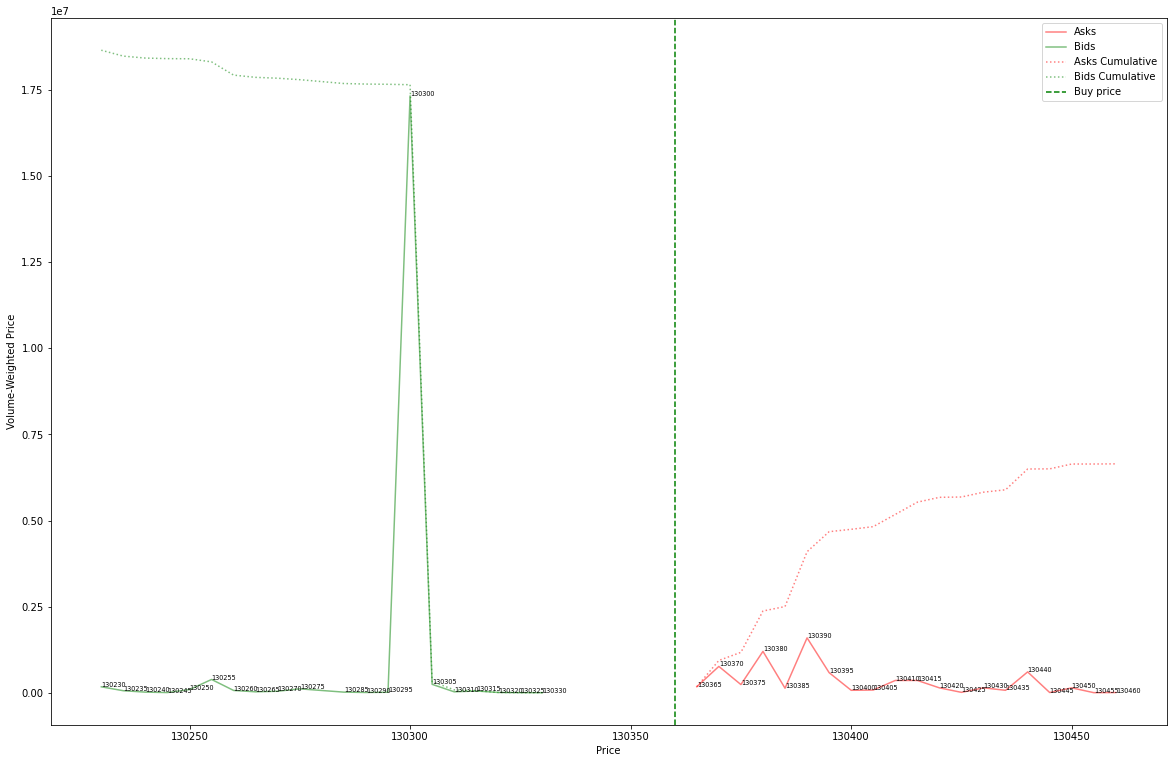

In [467]:
plot_orderbook(ob[1519], prices[1519])

In [469]:
prices[1519]

('Sell price', 130360)

In [466]:
for i in range(len(ob)):
    if spread(ob[i]) == 35:
        print(i)

1519
5275
6665
6890
7022
8469


5
[97081.37299771167, 1198.5812356979404, 7491.41876430206, 29966.819221967962, 97096.2013729977, 36262.62013729977, 86614.02745995423, 24276.83066361556, 50653.59267734554, 29973.684210526313, 252088.30663615558, 388488.60411899316, 2217107.551487414, 132204.1304347826, 554319.1990846682, 456004.15331807785, 554361.5102974828, 36279.233409610984, 43176.93363844393, 4797.620137299771]
[1462.9608938547487, 1462.905027932961, 365.7122905027933, 17919.217877094972, 23403.798882681564, 44246.117318435754, 914141.0614525139, 500564.5251396648, 61791.21508379889, 3290.530726256983, 176950.67039106146, 307458.32402234635, 52642.45810055866, 13160.111731843575, 161205.2094972067, 93575.86592178771, 328965.08379888267, 842118.43575419, 82234.98603351954, 228421.7877094972]
Cum
['97081', '98280', '105771', '135738', '232834', '269097', '355711', '379988', '430641', '460615', '712703', '1101192', '3318300', '3450504', '4004823', '4460827', '5015189', '5051468', '5094645', '5099442']
['1463', '292

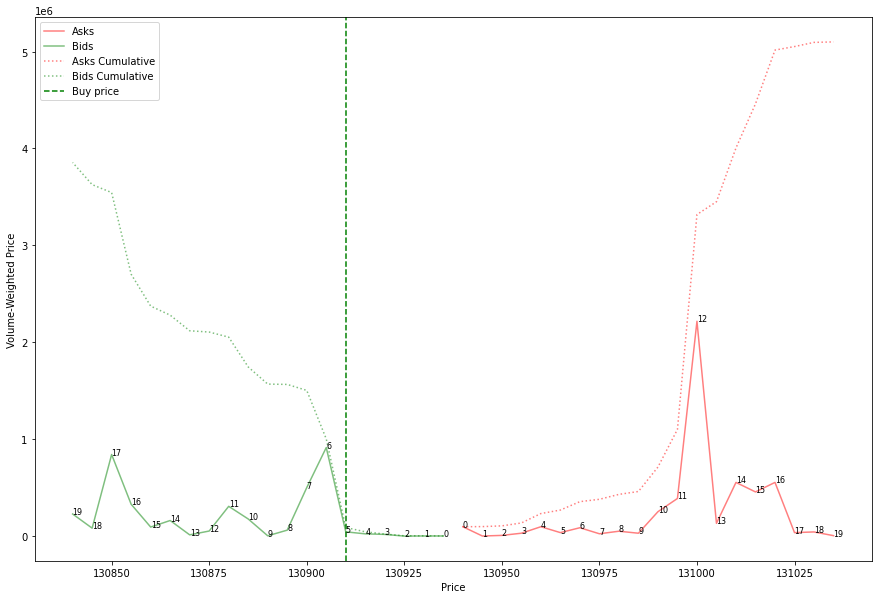

In [365]:
x = 5
plot_orderbook(ob[x], prices[x])

In [338]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x / 10000))

In [344]:
def find_price(orderbook, message):
    
    side = message[0].split()[0]
    orders = [x for x in orderbook if x[2] == side]
    
    if side == 'Sell':
        orders.sort(key=lambda x: x[0])

    spread_local = spread(orderbook) 
    # Compute the volume-weighted price for each level
    order_prices = [x[0] for x in orders]

    order_volumes = [x[1] for x in orders]
    order_vwp = [a*b for a, b in zip(order_prices, order_volumes)]
    

    order_weights = np.array(order_volumes) / sum(order_volumes)
    

    order_vwp_weighted = [a*b for a, b in zip(order_vwp, order_weights)]
 
    ask_cumsum = np.cumsum(order_vwp_weighted[::-1])
    #print(order_vwp_weighted)
    changes = [100.0 * (b - a) / a for a, b in zip(order_vwp_weighted[:-1], order_vwp_weighted[1:])]
    changes_absolute = [sigmoid(b - a) for a, b in zip(order_vwp_weighted[:-1], order_vwp_weighted[1:])]

    #print(changes)
    #print(changes_absolute)

    total_changes = np.array(changes) * np.array(changes_absolute) 
    #print(order_vwp_weighted[:-1])
    #print(order_vwp_weighted[1:])
    #print(["{:.0f}".format(num) for num in total_changes])
    changes.insert(0, 0)
    
    for i, change in enumerate(total_changes):
        if change > 400:
            return orders[i - 1][0]

    return None


In [340]:
x = 4
find_price(ob[x], prices[x])

[296078.44705882354, 1232.4235294117645, 7702.941176470588, 30812.941176470587, 99837.74117647059, 69334.41176470589, 60400.28235294118, 30817.647058823528, 30818.823529411766, 44380.8, 224686.3764705882, 399457.694117647, 2333032.941176471, 149191.57647058825, 569970.5647058823, 69360.88235294117, 570014.0705882353, 37303.58823529412, 37305.01176470588, 2774.858823529412]
[-99.58375101543041, 525.0238649814809, 300.0152730049637, 224.0123706616777, -30.552904194665036, -12.885563148763238, -48.97764404685293, 0.0038175224279525972, 44.00549702244618, 406.26932473183945, 77.78456370715323, 484.0500697651735, -93.60525203748918, 282.0393739309048, -87.83079572034865, 721.8091397507494, -93.45567238422763, 0.0038160656363181596, -92.56169964231267]
[1.566750698549136e-13, 0.6563457773839543, 0.9097839660390803, 0.9989957203737141, 0.04520310163888413, 0.29040601863309934, 0.04934740408713733, 0.5000294117646721, 0.7951410207286557, 0.9999999852283741, 0.9999999743091719, 1.0, 1.435405465

130940

5
[55677.180043383945, 55679.305856832965, 55681.43167028199, 48012.86334056399, 55685.68329718004, 102567.85249457702, 10228.763557483731, 348075.37960954447, 454646.420824295, 1163939.262472885, 40921.30151843817, 768440.4338394793, 163697.70065075922, 525501.0412147505, 34390.50976138828, 40929.11062906725, 4547.852494577007, 7106.290672451193, 102618.75271149675, 601522.3427331888]
[386.283185840708, 6179.8230088495575, 18924.985250737464, 9655.23598820059, 98865.8407079646, 6178.879056047198, 55607.78761061947, 781954.6460176992, 473016.22418879054, 98846.9616519174, 3474.955752212389, 170266.32743362832, 241297.93510324485, 38606.19469026549, 9651.179941002949, 154412.97935103244, 204203.3628318584, 395267.02064896753, 747273.1563421829, 46702.78761061947]
Cum
['55677', '111356', '167038', '215051', '270736', '373304', '383533', '731608', '1186255', '2350194', '2391115', '3159556', '3323254', '3848755', '3883145', '3924074', '3928622', '3935728', '4038347', '4639869']
['386', '65

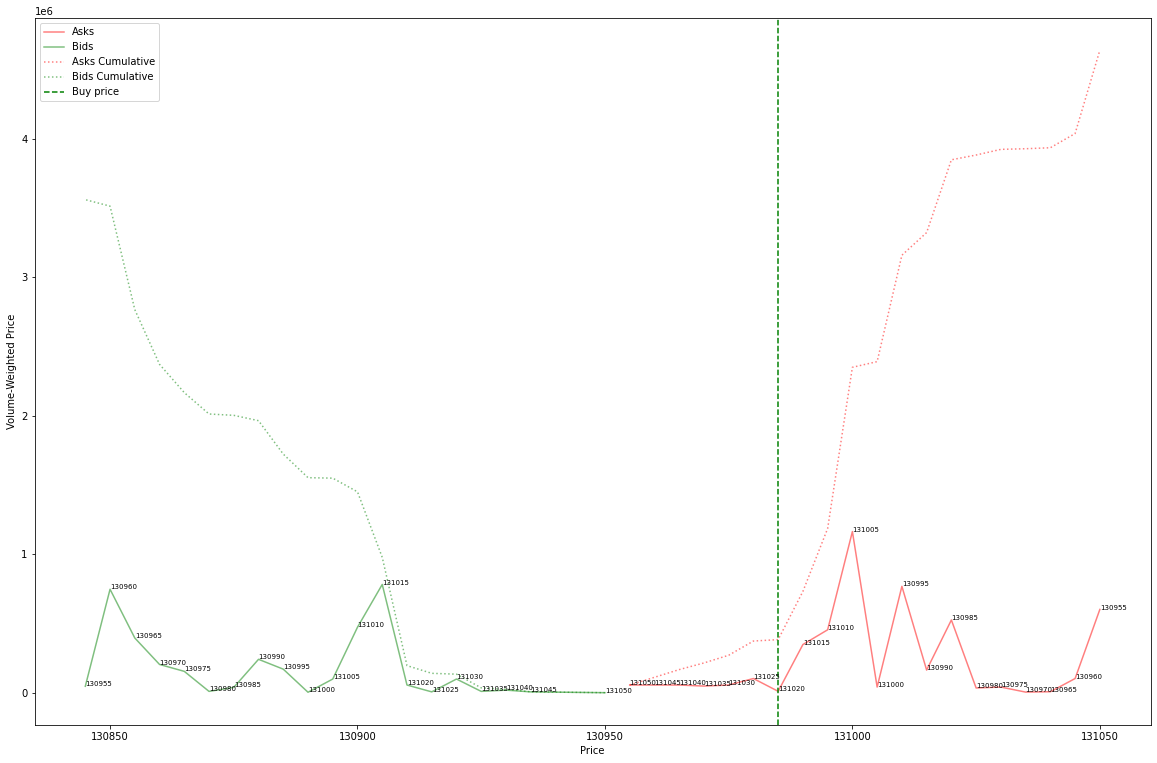

In [378]:
x = 8
plot_orderbook(ob[x], prices[x])

In [46]:
result[result['ans'] == 'inside spread']['spread'].describe()


count    59.000000
mean     26.949153
std       5.001461
min      20.000000
25%      25.000000
50%      25.000000
75%      30.000000
max      50.000000
Name: spread, dtype: float64

In [47]:
result[result['ans'] == 'on bid']['spread'].describe()

count    413.000000
mean      16.041162
std        2.389449
min       15.000000
25%       15.000000
50%       15.000000
75%       15.000000
max       40.000000
Name: spread, dtype: float64

In [48]:
result[result['ans'] == 'on ask']['spread'].describe()

count    405.000000
mean      16.160494
std        2.816398
min       15.000000
25%       15.000000
50%       15.000000
75%       15.000000
max       45.000000
Name: spread, dtype: float64

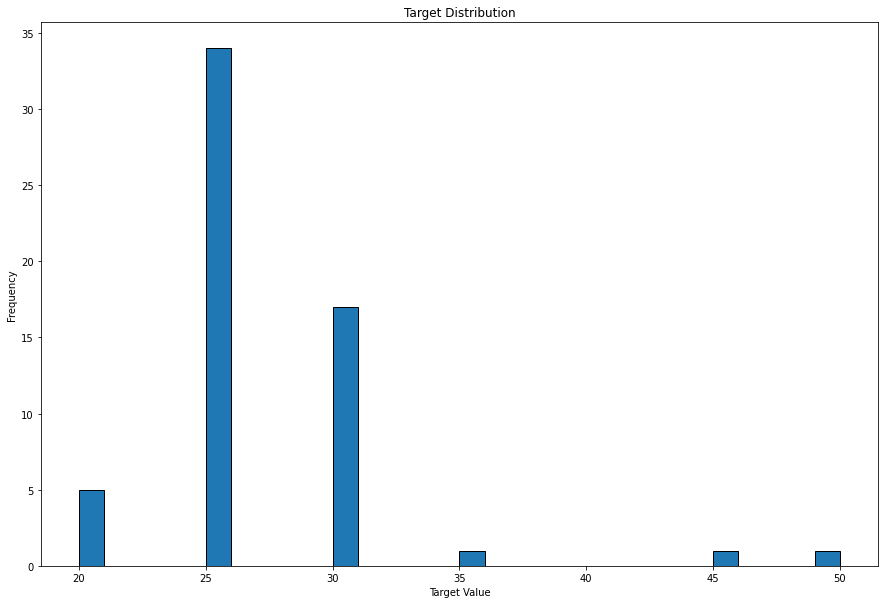

In [49]:
plt.figure(figsize=(15, 10))
plt.hist(result[result['ans'] == 'inside spread']['spread'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

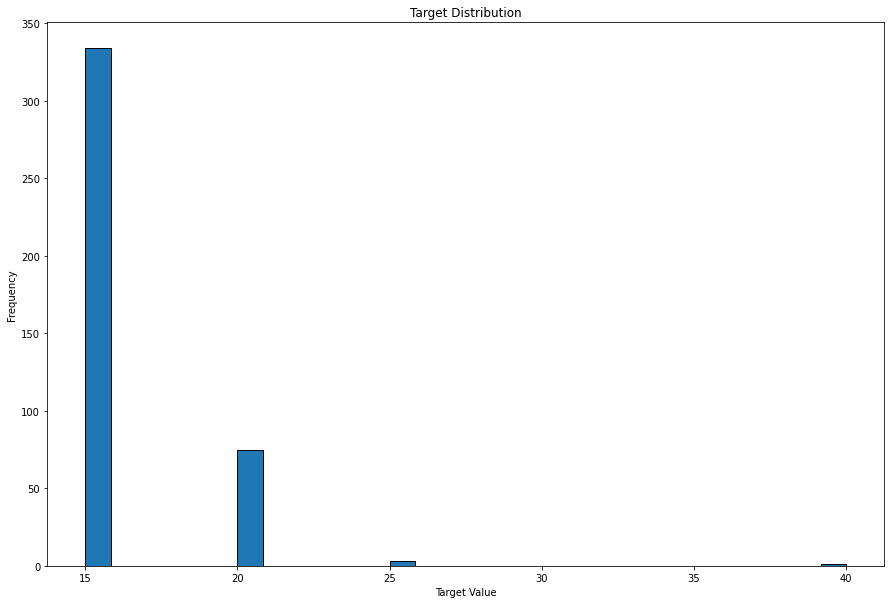

In [50]:
plt.figure(figsize=(15, 10))
plt.hist(result[result['ans'] == 'on bid']['spread'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

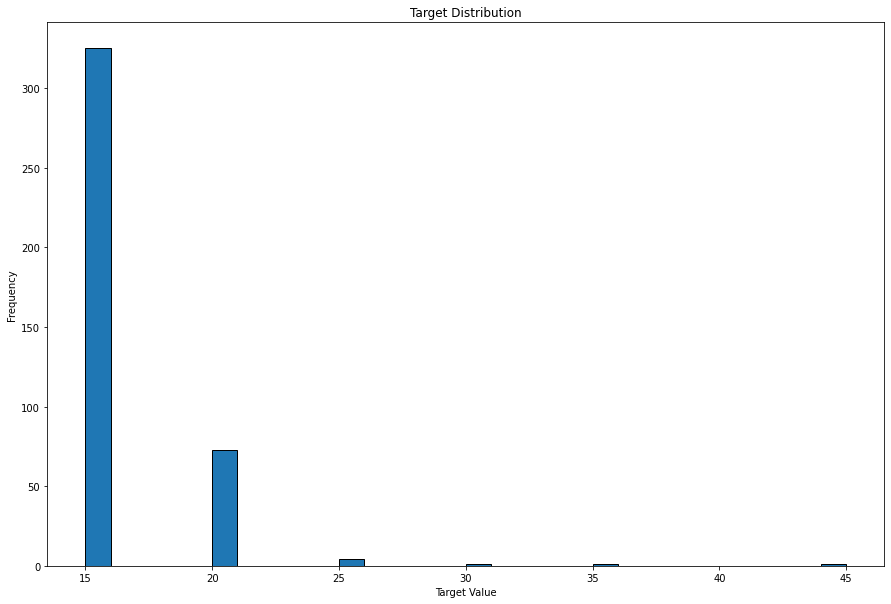

In [51]:
plt.figure(figsize=(15, 10))
plt.hist(result[result['ans'] == 'on ask']['spread'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

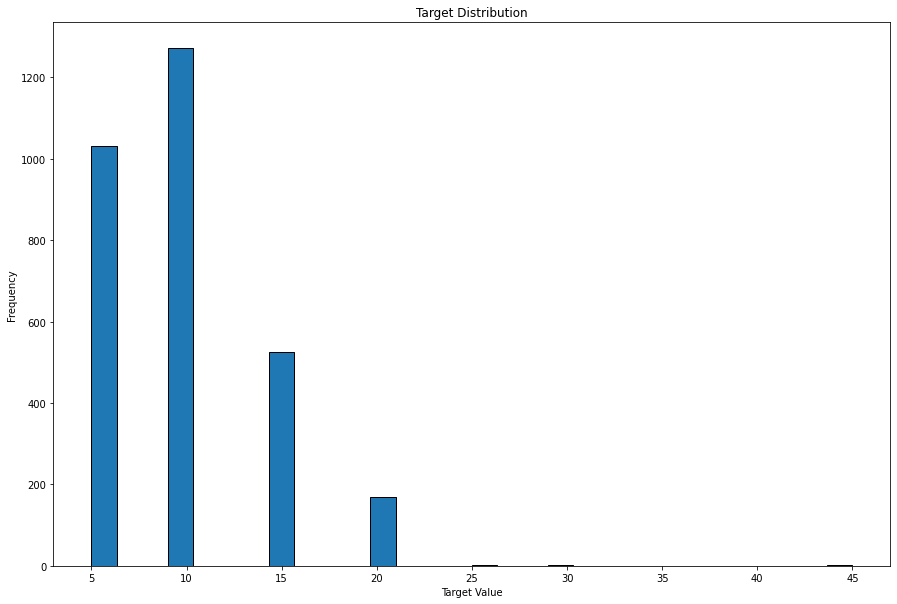

In [52]:
plt.figure(figsize=(15, 10))
plt.hist(result[result['ans'] == 'regular']['spread'], bins=30, edgecolor='black')
plt.title('Target Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

Агааа, видим интересные закономерности, те ответы которые попадают внутрь спреда появляются только в случаях когда спред не меньше 20, на границы попадают ответы когда спред либо 15 либо 20 в более чем 90 процентах случаев, в один из других слоев стакана ответ попадает если спред от 5 до 20. Осталось найти какие-то другие закономерности чтобы понять как в случае с 'inside spread' и  'regular' выбирать число, а также как разделять граничные случаи для on bid, on ask и других видов. Хочу посмотреть на послойное распределение ответов. Сделаем то же самое, что выше, только для каждого уровня

In [53]:
%autoreload 2
from func import identify_level_and_direction

ans2  = []

for i in range(len(train_ob)):
    bid_price = best_bid(train_ob[i])
    ask_price = best_ask(train_ob[i])

    left_edge = max([price for price, _, _ in train_ob[i]])
    right_edge = min([price for price, _, _ in train_ob[i]])

    if train_prices[i][1] > left_edge:
        ans2.append('more max')   
    elif train_prices[i][1] < right_edge:
        ans2.append('less min')
    elif train_prices[i][1] < ask_price and train_prices[i][1] > bid_price:
        ans2.append('inside spread') 
    else:
        answer = identify_level_and_direction(train_ob[i], train_prices[i][1])
        ans2.append(answer)

result['ans2'] = ans2

In [54]:
result.head()

,target,spread,mid price,vwap,market depth sell,market depth buy,w mid price,rel spread,price range,type,ans,ans2
0,130895,10,130935.0,130927.130145,53574545,64128945,130927.130145,0.000076,200,Sell price,regular,ask_4
1,130900,5,131082.5,131097.670623,128789175,92110400,131097.670623,0.000038,200,Sell price,regular,ask_4
2,130940,10,130525.0,130553.300349,75088265,37057020,130553.300349,0.000077,205,Sell price,regular,ask_2
3,130915,10,131850.0,131823.800623,42738730,126523030,131823.800623,0.000076,200,Sell price,regular,ask_3
4,130985,10,130670.0,130647.497041,38171970,72225165,130647.497041,0.000077,205,Buy price,regular,bid_8


<AxesSubplot:>

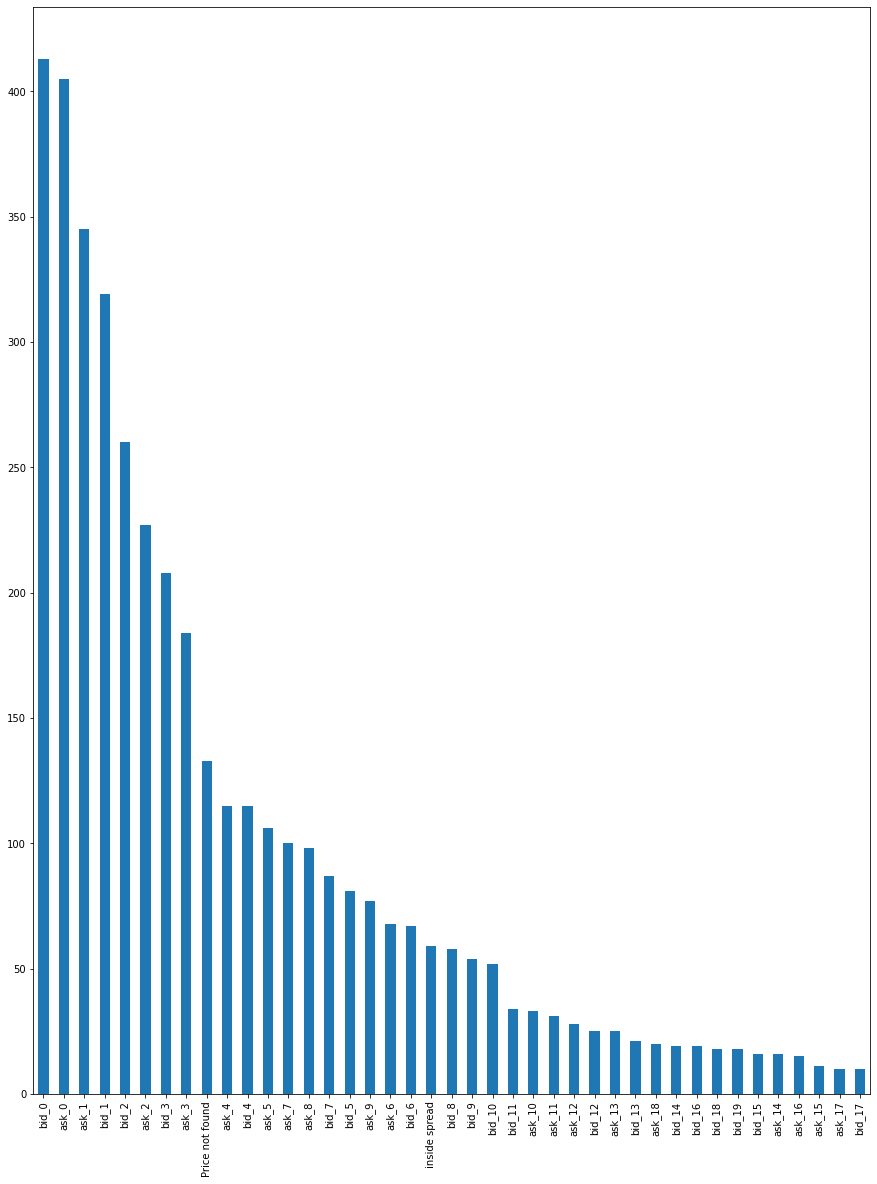

In [55]:
plt.figure(figsize=(15, 20))
result['ans2'].value_counts().plot(kind='bar')

In [56]:
indexes = result[result['ans2'] == 'ask_0']['spread'].describe().index
indexes 

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [57]:
stats = pd.DataFrame(index = indexes)
for el in result['ans2'].unique():
    local_df = result[result['ans2'] == el]['spread'].describe().values
    stats[el] = local_df 


stats

,ask_4,ask_2,ask_3,bid_8,ask_0,bid_7,bid_1,ask_7,bid_6,ask_5,...,ask_6,ask_8,ask_16,inside spread,ask_10,bid_13,bid_17,bid_14,ask_14,bid_19
count,115.000000,227.000000,184.00000,58.000000,405.000000,87.000000,319.000000,100.00000,67.000000,106.000000,...,68.000000,98.000000,15.000000,59.000000,33.000000,21.000000,10.000000,19.000000,16.00000,18.0
mean,9.173913,10.352423,8.61413,9.224138,16.160494,8.563218,11.880878,9.30000,8.358209,8.820755,...,9.705882,9.183673,8.666667,26.949153,9.242424,8.809524,9.500000,9.473684,9.68750,5.0
std,4.632571,4.423292,3.96129,4.664322,2.816398,3.881085,3.056838,4.82104,4.298349,5.587055,...,5.455543,4.958273,4.418576,5.001461,4.351941,4.445436,3.689324,4.376305,5.90727,0.0
min,5.000000,5.000000,5.00000,5.000000,15.000000,5.000000,10.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,20.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.0
25%,5.000000,5.000000,5.00000,5.000000,15.000000,5.000000,10.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,25.000000,5.000000,5.000000,6.250000,5.000000,5.00000,5.0
50%,10.000000,10.000000,10.00000,10.000000,15.000000,10.000000,10.000000,10.00000,5.000000,5.000000,...,10.000000,7.500000,10.000000,25.000000,10.000000,10.000000,10.000000,10.000000,5.00000,5.0
75%,10.000000,15.000000,10.00000,10.000000,15.000000,10.000000,15.000000,10.00000,10.000000,10.000000,...,11.250000,13.750000,10.000000,30.000000,10.000000,10.000000,10.000000,15.000000,15.00000,5.0
max,20.000000,20.000000,20.00000,20.000000,45.000000,15.000000,30.000000,20.00000,20.000000,45.000000,...,30.000000,20.000000,20.000000,50.000000,20.000000,20.000000,15.000000,15.000000,20.00000,5.0


In [58]:
stats.loc['min']

ask_4               5.0
ask_2               5.0
ask_3               5.0
bid_8               5.0
ask_0              15.0
bid_7               5.0
bid_1              10.0
ask_7               5.0
bid_6               5.0
ask_5               5.0
bid_10              5.0
ask_11              5.0
Price not found     5.0
ask_1               5.0
bid_2               5.0
bid_4               5.0
bid_18              5.0
bid_15              5.0
bid_0              15.0
bid_3               5.0
bid_5               5.0
ask_15              5.0
bid_12              5.0
ask_18              5.0
ask_9               5.0
bid_16              5.0
bid_11              5.0
bid_9               5.0
ask_13              5.0
ask_17              5.0
ask_12              5.0
ask_6               5.0
ask_8               5.0
ask_16              5.0
inside spread      20.0
ask_10              5.0
bid_13              5.0
bid_17              5.0
bid_14              5.0
ask_14              5.0
bid_19              5.0
Name: min, dtype

Начинаем проверять качество

In [59]:
def find_no_match(ob, side):
    price_arr = [tp[0] for tp in ob if tp[2] == side]
    if side == 'Sell':
        price_arr.sort()

        for i in range(1, len(price_arr)):
            if abs(price_arr[i] - price_arr[i - 1]) != 5:
                return price_arr[i- 1] + 5
        return False
    else:
        for i in range(1, len(price_arr)):
            if abs(price_arr[i] - price_arr[i - 1]) != 5:
                return price_arr[i] - 5
        return False

In [60]:
def logic(ob, message):
    local_spread = spread(ob)
    bid0 = best_bid(ob)
    ask0 = best_ask(ob)
    side = message[0].split()[0]

    if side == 'Sell' and local_spread >= 20:
        print('case 1',  end = ' ')
        return ['1', ask0 - 5]
    if side == 'Buy' and local_spread >= 20:
        print('case 2', end = ' ')
        return ['2', bid0 + 5]
    if find_no_match(ob, side):
        print('case 3', end = ' ')
        return ['3', find_no_match(ob, side)]
    if local_spread < 20 and side == 'Sell':
        print('case 4', end = ' ')
        return ['4', ask0]
    if local_spread < 20 and side == 'Buy':
        print('case 5' , end = ' ')
        return ['5', bid0]
    
    


In [61]:
test_answers = []

for i in range(len(test_prices)):
    test_answers.append(test_prices[i][1])

print(len(test_prices))

5000


In [62]:
def plot_wrong_glass(glass, algorithm_price, inc_level, is_wrong = True):

    buys = [pair for pair in glass if pair[2] == 'Buy']
    sells = [pair for pair in glass if pair[2] == 'Sell']

    buys = sorted(buys, key=lambda x: x[0])
    sells = sorted(sells, key=lambda x: x[0])

    buy_prices = [pair[0] for pair in buys]
    buy_volumes = [pair[1] for pair in buys]
    sell_prices = [pair[0] for pair in sells]
    sell_volumes = [pair[1] for pair in sells]

    spread = sell_prices[0] - buy_prices[-1] if buys and sells else 0
    midprice = (sell_prices[0] + buy_prices[-1])/2 if buys and sells else 0

    direction = algorithm_price[0]
    plt.figure(figsize=(15, 20))
    plt.barh(buy_prices, buy_volumes, height=0.3, align='center', color='green', label='Buy')
    plt.barh(sell_prices, sell_volumes, height=0.3, align='center', color='red', label='Sell')

    # plt.axhline(y=algorithm_price[1], color='blue', linestyle='--')
    plt.text(x = plt.xlim()[1], y = algorithm_price[1], s = f' Algorithm: {direction}', va = 'center')

    plt.axhline(y=midprice, color='purple', linestyle='--')
    plt.text(x = plt.xlim()[1], y = midprice, s = f' Mid Price', va = 'center')
    if is_wrong:
        #plt.axhline(y=inc_level, color='purple', linestyle='--')
        plt.text(x = plt.xlim()[1], y = inc_level, s = f'Algo mistake', va = 'center')

    plt.legend(title=f'Spread: {spread}')
    plt.ylabel('Price')
    plt.xlabel('Volume')
    plt.title('Order Book')
    plt.grid(True)
    plt.yticks(list(plt.yticks()[0]) + [midprice, algorithm_price[1]])
    plt.show()

In [63]:
from func import calculate_accuracy

res = []
test_answers = []
corr_counter = 0
wrong_counter = 0
for i in range(len(test_ob)):
    mes = test_prices[i]
    print(logic(test_ob[i], mes))
    local_res = logic(test_ob[i], mes)
    if local_res != None:
        local_ans = local_res[1]
        case = local_res[0]
        test_answers.append(test_prices[i][1])
        res.append(local_ans)
        # if local_ans != test_prices[i][1]:
        #     plot_wrong_glass(test_ob[i], test_prices[i], local_ans)
        if local_ans == test_prices[i][1]:
            if case == '1' or case == '2':
                corr_counter +=1
            print('correct')
        else:
            if case == '1' or case == '2':
                wrong_counter +=1
                #plot_wrong_glass(test_ob[i], mes, local_ans)
            print('wrong')
metrics = calculate_accuracy(test_answers, res)
print(metrics)
print(wrong_counter)
print(corr_counter)

case 4 ['4', 131985]
case 4 wrong
case 4 ['4', 131425]
case 4 correct
case 5 ['5', 132045]
case 5 wrong
case 3 ['3', 131325]
case 3 correct
case 4 ['4', 131405]
case 4 wrong
case 3 ['3', 131580]
case 3 wrong
case 5 ['5', 130820]
case 5 wrong
case 3 ['3', 131800]
case 3 wrong
case 5 ['5', 131900]
case 5 wrong
case 4 ['4', 132075]
case 4 wrong
case 4 ['4', 130345]
case 4 wrong
case 2 ['2', 131865]
case 2 correct
case 4 ['4', 130785]
case 4 wrong
case 5 ['5', 130765]
case 5 wrong
case 5 ['5', 131410]
case 5 wrong
case 4 ['4', 131480]
case 4 wrong
case 4 ['4', 131420]
case 4 wrong
case 5 ['5', 131390]
case 5 wrong
case 5 ['5', 130360]
case 5 wrong
case 3 ['3', 130880]
case 3 wrong
case 3 ['3', 130405]
case 3 wrong
case 4 ['4', 132030]
case 4 wrong
case 5 ['5', 131400]
case 5 wrong
case 4 ['4', 130965]
case 4 wrong
None
case 5 ['5', 130940]
case 5 wrong
case 4 ['4', 132020]
case 4 wrong
case 5 ['5', 131870]
case 5 wrong
case 5 ['5', 131755]
case 5 wrong
case 3 ['3', 131865]
case 3 wrong
cas

маркет мейкер должен держать спред, попробуем понять как спред старается дрежать даныый бот. Для этого мы можем посмотреть на то как часто и при каких спредах бот ставится на лучший аск или лучший бид. В случае, когда он ставится на лучший аск или лучший бид, это означает, что бота устраивает данный спред. на лучший бид или на лучший аск бот ставит когда спред 15 или 20, это значит, что данный спред его устраивает если спред становится больше, то бота это не устраивает и он пытается его самостоятельно сузить, выставляя цену на уровен +-5 от бида или аска соответственно. Добавим это в логик алгоритма

In [203]:
def logic1(ob, message):
    local_spread = spread(ob)
    bid0 = best_bid(ob)
    ask0 = best_ask(ob)
    side = message[0].split()[0]

    if side == 'Sell' and local_spread > 20:
        print('case 1',  end = ' ')
        return ['1', ask0 - 5]
    elif side == 'Buy' and local_spread > 20:
        print('case 2', end = ' ')
        return ['2', bid0 + 5]
    elif (local_spread == 15 or local_spread == 20) and (side == 'Sell'):
        print('case 3', end = ' ')
        return ['3', ask0]
    elif (local_spread == 15 or local_spread == 20) and (side == 'Buy'):
        print('case 4', end = ' ')
        return ['4', bid0]
    else:
        price = find_price(ob, message)
        print('case 5', end = ' ')
        return ['5', price]
        


In [206]:
from func import calculate_accuracy

res = []
test_answers = []
corr_counter = 0
wrong_counter = 0
wrong_cases = [0,0,0,0,0,0]
corr_cases = [0,0,0,0,0,0]
for i in range(len(test_ob)):
    mes = test_prices[i]
    local_res = logic1(test_ob[i], mes)
    if local_res != None:
        local_ans = local_res[1]
        case = local_res[0]
        test_answers.append(test_prices[i][1])
        res.append(local_ans)
        # if local_ans != test_prices[i][1]:
        #     plot_wrong_glass(test_ob[i], test_prices[i], local_ans)
        if local_ans == test_prices[i][1]:
            corr_cases[int(case[-1]) - 1] += 1
            print('correct')
            corr_counter +=1
        else:
            wrong_counter +=1
            wrong_cases[int(case[-1]) - 1] += 1
            print('wrong')
            #plot_wrong_glass(test_ob[i], mes, local_ans)
metrics = calculate_accuracy(test_answers, res)
print(metrics * 100)
print(wrong_counter)
print(corr_counter)
print(wrong_cases)
print(corr_cases)
all_cases = np.array(wrong_cases) + np.array(corr_cases)
print(all_cases)
print(np.array(corr_cases) / all_cases * 100)

case 1 correct
case 5 wrong
case 5 wrong
case 4 wrong
case 4 wrong
case 5 wrong
case 5 wrong
case 5 wrong
case 5 wrong
case 4 correct
case 3 correct
case 2 correct
case 3 wrong
case 4 wrong
case 3 wrong
case 5 wrong
case 5 wrong
case 3 correct
case 5 wrong
case 5 wrong
case 4 wrong
case 5 correct
case 5 wrong
case 5 wrong
case 5 wrong
case 3 wrong
case 5 wrong
case 3 correct
case 5 wrong
case 5 wrong
case 5 wrong
case 3 wrong
case 5 wrong
case 3 correct
case 5 wrong
case 3 wrong
case 2 correct
case 5 wrong
case 4 wrong
case 5 wrong
case 5 correct
case 5 wrong
case 5 wrong
case 4 correct
case 3 wrong
case 3 correct
case 5 correct
case 4 wrong
case 5 wrong
case 3 wrong
case 5 wrong
case 3 correct
case 5 wrong
case 5 correct
case 5 wrong
case 5 wrong
case 3 wrong
case 4 wrong
case 5 wrong
case 4 wrong
case 3 wrong
case 5 wrong
case 5 wrong
case 4 wrong
case 3 wrong
case 4 wrong
case 5 wrong
case 4 correct
case 5 wrong
case 4 wrong
case 5 wrong
case 5 wrong
case 5 correct
case 2 correct
ca

/var/folders/qf/dx99gg996lgcsvbhyzj5p2c00000gn/T/ipykernel_6415/1572788982.py:36: RuntimeWarning: invalid value encountered in true_divide
  print(np.array(corr_cases) / all_cases * 100)


In [87]:
from func import calculate_density
print(calculate_density(train_ob[6]))
print(train_prices[6])

{'Sell': {131665: 0.009900990099009901, 131675: 0.03296703296703297, 131680: 0.2558139534883721, 131685: 0.7283950617283951, 131690: 1.0789473684210527, 131695: 1.8873239436619718, 131700: 5.287878787878788, 131705: 5.819672131147541, 131710: 6.732142857142857, 131715: 7.882352941176471, 131720: 9.717391304347826, 131725: 11.317073170731707, 131730: 13.555555555555555, 131735: 17.29032258064516, 131740: 22.23076923076923, 131745: 30.80952380952381, 131750: 45.875, 131755: 67.9090909090909, 131760: 134.0, 131765: 832.0}, 'Buy': {131565: 2.0, 131570: 1.1666666666666667, 131575: 6.090909090909091, 131580: 5.0625, 131585: 4.142857142857143, 131590: 3.423076923076923, 131595: 2.903225806451613, 131600: 3.4444444444444446, 131605: 3.7804878048780486, 131610: 3.608695652173913, 131615: 3.549019607843137, 131620: 3.9642857142857144, 131625: 3.7868852459016393, 131630: 3.6666666666666665, 131635: 3.507042253521127, 131640: 3.3289473684210527, 131645: 3.3950617283950617, 131650: 3.38372093023255

Подбираем параметр

In [347]:
def logic2(ob, message):
    local_spread = spread(ob)
    bid0 = best_bid(ob)
    ask0 = best_ask(ob)
    side = message[0].split()[0]

    if side == 'Sell' and local_spread > 20:
        return ['1', ask0 - 5]
    elif side == 'Buy' and local_spread > 20:
        
        return ['2', bid0 + 5]
    elif (local_spread == 15 or local_spread == 20) and (side == 'Sell'):
        
        return ['3', ask0]
    elif (local_spread == 15 or local_spread == 20) and (side == 'Buy'):
        return ['4', bid0]
    else:
        price = find_price(ob, message)
        return ['5', price]

In [315]:
def find_price(orderbook, message, param):
    
    side = message[0].split()[0]
    orders = [x for x in orderbook if x[2] == side]
    
    if side == 'Sell':
        orders.sort(key=lambda x: x[0])

    spread_local = spread(orderbook) 
    # Compute the volume-weighted price for each level
    order_prices = [x[0] for x in orders]

    order_volumes = [x[1] for x in orders]
    order_vwp = [a*b for a, b in zip(order_prices, order_volumes)]
    

    order_weights = np.array(order_volumes) / sum(order_volumes)
    

    order_vwp_weighted = [a*b for a, b in zip(order_vwp, order_weights)]
    


    ask_cumsum = np.cumsum(order_vwp_weighted[::-1])

    changes = [100.0 * (b - a) / a for a, b in zip(order_vwp_weighted[:-1], order_vwp_weighted[1:])]
    
    #print(order_vwp_weighted[:-1])
    #print(order_vwp_weighted[1:])
    changes.insert(0, 0)
    
    for i, change in enumerate(changes):
        if change > param:
            return orders[i - 1][0]

    return None

10
[373.51891506067096, 2334.5824411134904, 5976.759457530336, 149424.6966452534, 314177.4304068523, 21014.4539614561, 45206.152748037115, 419293.7473233405, 127875.93504639543, 252585.63882940754, 9506046.306209851, 172731.70592433977, 13452.847965738758, 108000.59957173448, 108004.72519628837, 35915745.89578872, 11305.85653104925, 5980.185581727337, 1495.1034975017844, 9344.75374732334]
[484.5, 48448.148148148146, 124022.51851851853, 12111.111111111111, 353146.5, 48438.88888888888, 23734.148148148146, 81855.46296296296, 12108.333333333332, 58602.0925925926, 379688.2962962963, 4358.5, 69733.33333333334, 559782.2962962963, 17431.333333333336, 69722.66666666667, 108937.5, 174777.4814814815, 48412.96296296296, 327259.1111111111]
Cum
['374', '2708', '8685', '158110', '472287', '493301', '538508', '957801', '1085677', '1338263', '10844309', '11017041', '11030494', '11138494', '11246499', '47162245', '47173551', '47179531', '47181026', '47190371']
['484', '48933', '172955', '185066', '53821

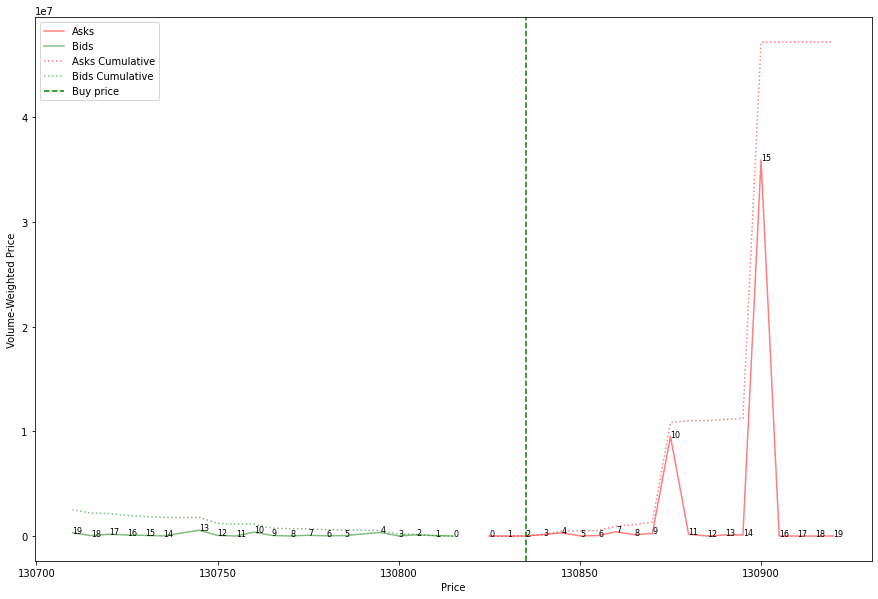

In [314]:
x = 3024
plot_orderbook(ob[x], prices[x])

In [348]:
from func import calculate_accuracy

res = []
test_answers = []
corr_counter = 0
wrong_counter = 0
best_metrics = [0, 0]
for p in range(10, 300):
    for i in range(len(test_ob)):
        mes = test_prices[i]
        local_res = logic2(test_ob[i], mes)
        if local_res != None:
            local_ans = local_res[1]
            case = local_res[0]
            test_answers.append(test_prices[i][1])
            res.append(local_ans)
    metrics = calculate_accuracy(test_answers, res)
    if metrics > best_metrics[0]:
        best_metrics[0] = metrics
        best_metrics[1] = p

    print(metrics * 100)

print(best_metrics)

/var/folders/qf/dx99gg996lgcsvbhyzj5p2c00000gn/T/ipykernel_6415/4197271748.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x / 10000))


21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12
21.12


KeyboardInterrupt: 

In [349]:
from func import calculate_accuracy

res = []
test_answers = []
corr_counter = 0
wrong_counter = 0
best_metrics = [0, 0]
for i in range(len(test_ob)):
    mes = test_prices[i]
    local_res = logic2(test_ob[i], mes)
    if local_res != None:
        local_ans = local_res[1]
        case = local_res[0]
        test_answers.append(test_prices[i][1])
        res.append(local_ans)
metrics = calculate_accuracy(test_answers, res)


print(metrics * 100)


21.12


/var/folders/qf/dx99gg996lgcsvbhyzj5p2c00000gn/T/ipykernel_6415/4197271748.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x / 10000))


In [242]:
def read_file_test(filename):

    with open(filename, 'r') as file:
        lines = file.readlines()

    orderbooks= []
    prices = []
    orderbook = []
    
    for line in lines:

        if "price:" in line:
            orderbooks.append(orderbook)
            action, price = line.split(":")
            prices.append((action.strip(), price.strip()))
            orderbook = []
        else: 
            parts = line.split("\t")
            if len(parts) == 3: 
                orderbook.append((int(parts[0]), int(parts[1]), parts[2].strip()))
    
    return orderbooks, prices

In [415]:
def plot_orderbook(orderbook, sell_price_tuple):
    # Split the orderbook into asks and bids
    asks = [x for x in orderbook if x[2] == 'Sell']
    bids = [x for x in orderbook if x[2] == 'Buy']
    spread_local = spread(orderbook) 
    print(spread_local)
    # Compute the volume-weighted price for each level
    ask_prices = [x[0] for x in asks]
    bid_prices = [x[0] for x in bids]

    ask_volumes = [x[1] for x in asks]
    bid_volumes = [x[1] for x in bids]
    ask_vwp = [a*b for a, b in zip(ask_prices, ask_volumes)]
    bid_vwp = [a*b for a, b in zip(bid_prices, bid_volumes)]

    ask_weights = np.array(ask_volumes) / sum(ask_volumes)
    bid_weights = np.array(bid_volumes) / sum(bid_volumes)

    best_ask_price = min(ask_prices)
    best_bid_price = max(bid_prices)

    # Apply weighting based on distance from best price
    # We add a small constant in the denominator to avoid division by zero
    # ask_weights = [1/(abs(best_ask_price - a) + 2) for a in ask_prices]
    # bid_weights = [1/(abs(b - best_bid_price) + 2) for b in bid_prices]
    # plt.bar(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    # plt.bar(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    ask_vwp_weighted = [a*b for a, b in zip(ask_vwp, ask_weights)]
    bid_vwp_weighted = [a*b for a, b in zip(bid_vwp, bid_weights)]

    plt.figure(figsize=(20, 13))
    print(ask_vwp_weighted[::-1])
    print(bid_vwp_weighted)

    print('Cum')

    ask_cumsum = np.cumsum(ask_vwp_weighted[::-1])
    bid_cumsum = np.cumsum(bid_vwp_weighted)

    print(["{:.0f}".format(num) for num in ask_cumsum])
    print(["{:.0f}".format(num) for num in bid_cumsum])

    print('Volumes')

    print(ask_volumes)
    print(bid_volumes)

    
    plt.plot(ask_prices, ask_vwp_weighted, color='r', alpha=0.5, label='Asks')
    plt.plot(bid_prices, bid_vwp_weighted, color='g', alpha=0.5, label='Bids')

    plt.plot(ask_prices[::-1], ask_cumsum, color='r', alpha=0.5, linestyle=':', label='Asks Cumulative')
    plt.plot(bid_prices, bid_cumsum, color='g', alpha=0.5, linestyle=':', label='Bids Cumulative')


    for i, txt in enumerate(ask_vwp_weighted):
        plt.text(ask_prices[i], txt, str(ask_prices[i]), fontsize=6.5)
    for i, txt in enumerate(bid_vwp_weighted):
        plt.text(bid_prices[i], txt, str(bid_prices[i]), fontsize=6.5)
    # Mark the sell price
    if sell_price_tuple[0].split()[1] == 'Sell':
        plt.axvline(x=sell_price_tuple[1], color='r', linestyle='--', label='Sell price')
    else:
        plt.axvline(x=sell_price_tuple[1], color='g', linestyle='--', label='Buy price')

    plt.xlabel('Price')
    plt.ylabel('Volume-Weighted Price')
    plt.legend()
    plt.show()

In [243]:
filename = "/Users/ilyalobanov/DS/FFT/junior_quant_task/test.txt" 
test_order, test_prices1 = read_file_test(filename)

In [413]:
test_order[3]

[(131410, 28, 'Sell'),
 (131405, 22, 'Sell'),
 (131400, 365, 'Sell'),
 (131395, 24, 'Sell'),
 (131390, 45, 'Sell'),
 (131385, 51, 'Sell'),
 (131380, 27, 'Sell'),
 (131375, 9, 'Sell'),
 (131370, 114, 'Sell'),
 (131365, 29, 'Sell'),
 (131360, 12, 'Sell'),
 (131355, 8, 'Sell'),
 (131350, 10, 'Sell'),
 (131345, 24, 'Sell'),
 (131340, 10, 'Sell'),
 (131335, 25, 'Sell'),
 (131330, 14, 'Sell'),
 (131325, 24, 'Sell'),
 (131320, 12, 'Sell'),
 (131315, 1, 'Sell'),
 (131310, 1, 'Buy'),
 (131300, 212, 'Buy'),
 (131295, 11, 'Buy'),
 (131290, 5, 'Buy'),
 (131285, 7, 'Buy'),
 (131280, 1, 'Buy'),
 (131275, 14, 'Buy'),
 (131270, 10, 'Buy'),
 (131265, 7, 'Buy'),
 (131260, 10, 'Buy'),
 (131255, 36, 'Buy'),
 (131250, 45, 'Buy'),
 (131245, 15, 'Buy'),
 (131240, 13, 'Buy'),
 (131235, 3, 'Buy'),
 (131230, 21, 'Buy'),
 (131225, 16, 'Buy'),
 (131220, 7, 'Buy'),
 (131215, 4, 'Buy'),
 (131210, 37, 'Buy')]

('Buy price', '')
5
[29860.4118993135, 7465.389016018306, 7465.675057208237, 1194.553775743707, 119459.9542334096, 776818.1121281465, 201902.79176201375, 2688.157894736842, 1194.7826086956522, 7467.677345537757, 86329.65675057209, 43017.11670480549, 1381380.3203661328, 76480.73226544622, 172088.23798627002, 172094.82837528604, 1148537.9405034324, 43027.00228832952, 970833.9130434783, 76498.30663615561]
[29388.513513513513, 2644.864864864865, 49662.78153153153, 84923.04054054053, 10578.243243243243, 4701.261261261261, 169238.91891891893, 359912.7252252252, 66103.88513513513, 117513.5135135135, 470036.03603603604, 57577.207207207204, 117500.0, 117495.49549549549, 380670.8108108108, 106031.55405405405, 763926.5878378379, 2222967.5675675673, 293.68243243243245, 23787.364864864867]
Cum
['29860', '37326', '44791', '45986', '165446', '942264', '1144167', '1146855', '1148050', '1155518', '1241847', '1284864', '2666245', '2742725', '2914814', '3086908', '4235446', '4278473', '5249307', '5325806

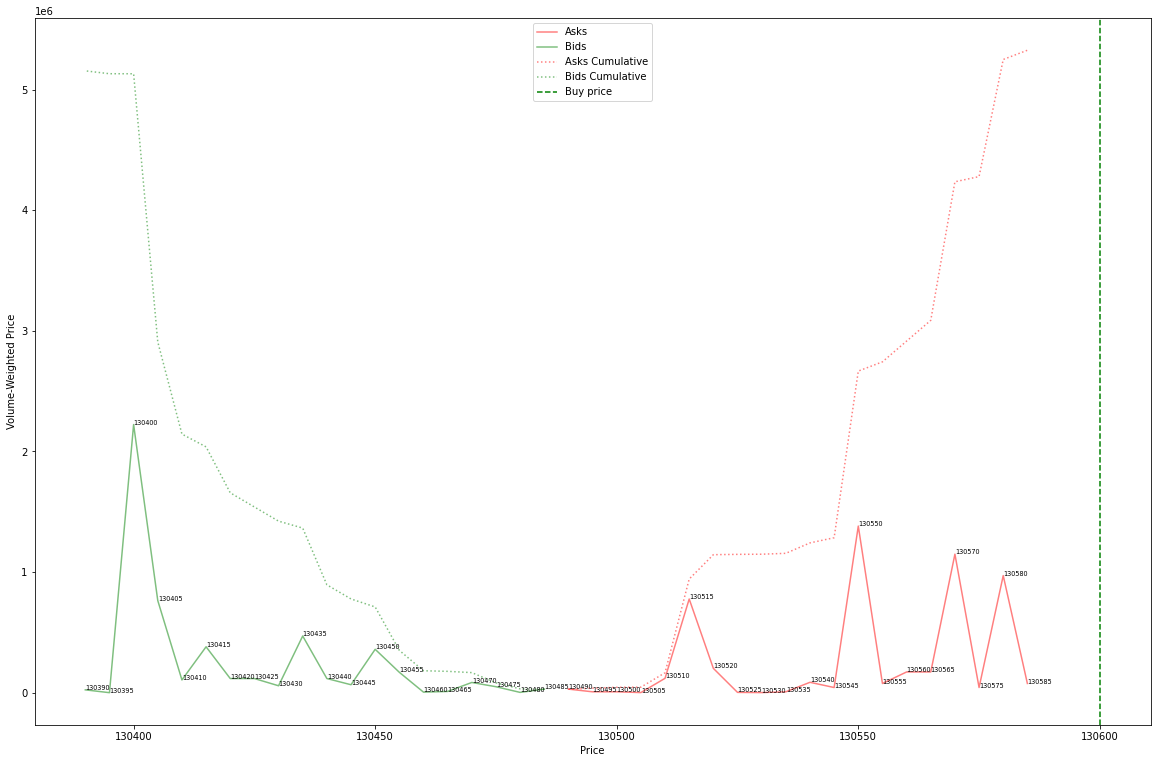

In [464]:
x = 24
print(test_prices1[x])
local_mes = ('Sell price', 130600)
plot_orderbook(test_order[x], local_mes)

Бонусное задание. 

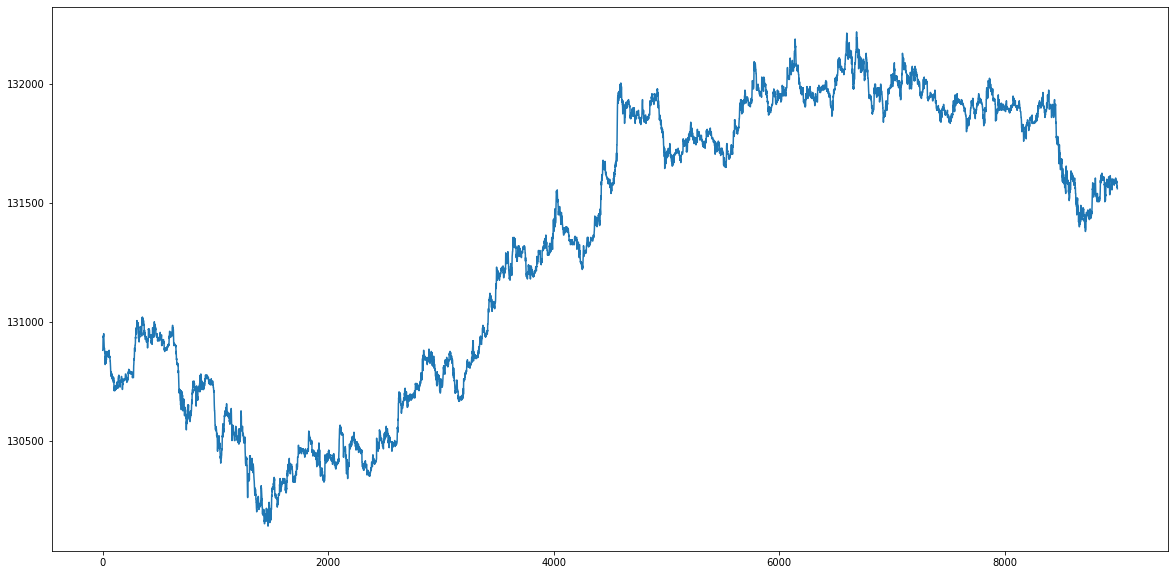

In [66]:
from func import best_bid
import matplotlib.pyplot as plt

token_price = []

for i in range(len(ob)):
    local_bid = best_bid(ob[i])
    token_price.append(local_bid)
SLICE = 9000
plt.figure(figsize=(20, 10))
plt.plot(token_price[:SLICE])
plt.show()